<a href="https://colab.research.google.com/github/Theosagie/Loan-repayment-predictive-model/blob/main/Model_to_predict_the_likelihood_of_customers_repaying_their_loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
import os
os.environ['OMP_NUM_THREADS']='1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:


fileName = '/content/drive/MyDrive/LBG Data.csv'

In [ ]:
data = pd.read_csv(fileName)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18324 entries, 0 to 18323
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18324 non-null  int64  
 1   addr_state              18324 non-null  object 
 2   annual_inc              18324 non-null  float64
 3   emp_length              17150 non-null  float64
 4   emp_title               17042 non-null  object 
 5   home_ownership          18324 non-null  object 
 6   installment             18324 non-null  float64
 7   loan_amnt               18324 non-null  int64  
 8   purpose                 18324 non-null  object 
 9   term                    18324 non-null  int64  
 10  int_rate                18324 non-null  float64
 11  avg_cur_bal             17758 non-null  float64
 12  inq_last_12m            9395 non-null   float64
 13  max_bal_bc              9395 non-null   float64
 14  mo_sin_old_il_acct      17192 non-null

In [ ]:
data.describe()

,id,annual_inc,emp_length,installment,loan_amnt,term,int_rate,avg_cur_bal,inq_last_12m,max_bal_bc,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort
count,1.832400e+04,1.832400e+04,17150.000000,18324.000000,18324.000000,18324.000000,18324.000000,17758.000000,9395.000000,9395.000000,...,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,18324.000000,17714.000000,18324.000000,18324.000000,1.792600e+04
mean,6.832645e+07,8.017611e+04,6.073178,467.543006,15522.661537,42.815979,13.850700,13466.600011,2.301863,5728.533475,...,7.964752,8.575619,8.268525,0.086092,2.274775,11.629284,45.489228,0.142054,24.750109,5.148915e+04
std,4.245703e+07,6.487345e+04,3.639694,278.099801,9349.294243,10.822769,4.822253,16550.730832,2.523087,5628.027589,...,4.847990,7.372691,4.627181,0.440718,1.936068,5.578496,35.907408,0.388198,12.192517,4.970348e+04
min,3.009180e+05,3.000000e+03,0.500000,30.650000,1000.000000,36.000000,5.310000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000e+00
25%,3.491424e+07,4.700000e+04,2.000000,259.302500,8000.000000,36.000000,10.490000,3129.000000,1.000000,2170.500000,...,4.000000,3.000000,5.000000,0.000000,1.000000,8.000000,12.500000,0.000000,16.000000,2.151850e+04
50%,6.838023e+07,6.500000e+04,6.000000,397.480000,14000.000000,36.000000,13.330000,7137.000000,2.000000,4244.000000,...,7.000000,7.000000,7.000000,0.000000,2.000000,11.000000,44.400000,0.000000,23.000000,3.897700e+04
75%,9.730784e+07,9.500000e+04,10.000000,635.720000,21000.000000,60.000000,16.990000,18436.500000,3.000000,7357.000000,...,10.000000,11.000000,11.000000,0.000000,3.000000,14.000000,75.000000,0.000000,32.000000,6.526700e+04
max,1.708249e+08,2.616000e+06,10.000000,1503.890000,40000.000000,60.000000,30.990000,341236.000000,28.000000,99609.000000,...,45.000000,78.000000,49.000000,10.000000,22.000000,50.000000,100.000000,6.000000,110.000000,1.501187e+06


In [ ]:
data.isna()
#to see the number of  missing values

,id,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18319,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18320,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18321,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18322,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

id                           0
addr_state                   0
annual_inc                   0
emp_length                1174
emp_title                 1282
home_ownership               0
installment                  0
loan_amnt                    0
purpose                      0
term                         0
int_rate                     0
avg_cur_bal                566
inq_last_12m              8929
max_bal_bc                8929
mo_sin_old_il_acct        1132
mo_sin_old_rev_tl_op       564
mo_sin_rcnt_rev_tl_op      564
mo_sin_rcnt_tl             564
mort_acc                   398
mths_since_last_delinq    9048
num_bc_tl                  564
num_il_tl                  564
num_op_rev_tl              564
num_tl_90g_dpd_24m         564
num_tl_op_past_12m         564
open_acc                     0
percent_bc_gt_75           610
pub_rec_bankruptcies         0
total_acc                    0
total_bal_ex_mort          398
loan_status                  0
dtype: int64

In [ ]:
set(data.duplicated())

{False}

In [ ]:
# we can pass the result of the df.duplicated into a set to see if there is any instance of True
# No duplicates in the data
set(data.duplicated())

{False}

In [ ]:
data.shape

(18324, 31)

In [ ]:
# Checking the class imbalance
data['loan_status'].value_counts(normalize=True)

Fully Paid     0.786837
Charged Off    0.213163
Name: loan_status, dtype: float64

In [ ]:
df=data

In [ ]:
df.head()

,id,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,802173,CA,72000.0,3.0,CA. Dept. Of Corrections,MORTGAGE,395.66,12000,debt_consolidation,36,...,NaN,NaN,NaN,NaN,16,NaN,0,23,NaN,Fully Paid
1,14518910,TX,97500.0,1.0,Curriculum & Implementation Manager,RENT,966.47,35000,debt_consolidation,60,...,2.0,12.0,0.0,1.0,13,87.5,0,24,84227.0,Fully Paid
2,54333324,NY,120000.0,1.0,Senior manager,RENT,806.57,25000,credit_card,36,...,2.0,7.0,0.0,1.0,8,100.0,0,16,39124.0,Fully Paid
3,62247022,CA,130000.0,10.0,Border Patrol Agent,RENT,846.17,25225,debt_consolidation,36,...,9.0,3.0,0.0,2.0,8,50.0,0,24,123331.0,Fully Paid
4,71986114,TX,58296.0,10.0,Account Manager,MORTGAGE,41.79,1200,other,36,...,7.0,6.0,0.0,0.0,9,100.0,0,17,51794.0,Fully Paid


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18324 entries, 0 to 18323
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18324 non-null  int64  
 1   addr_state              18324 non-null  object 
 2   annual_inc              18324 non-null  float64
 3   emp_length              17150 non-null  float64
 4   emp_title               17042 non-null  object 
 5   home_ownership          18324 non-null  object 
 6   installment             18324 non-null  float64
 7   loan_amnt               18324 non-null  int64  
 8   purpose                 18324 non-null  object 
 9   term                    18324 non-null  int64  
 10  int_rate                18324 non-null  float64
 11  avg_cur_bal             17758 non-null  float64
 12  inq_last_12m            9395 non-null   float64
 13  max_bal_bc              9395 non-null   float64
 14  mo_sin_old_il_acct      17192 non-null

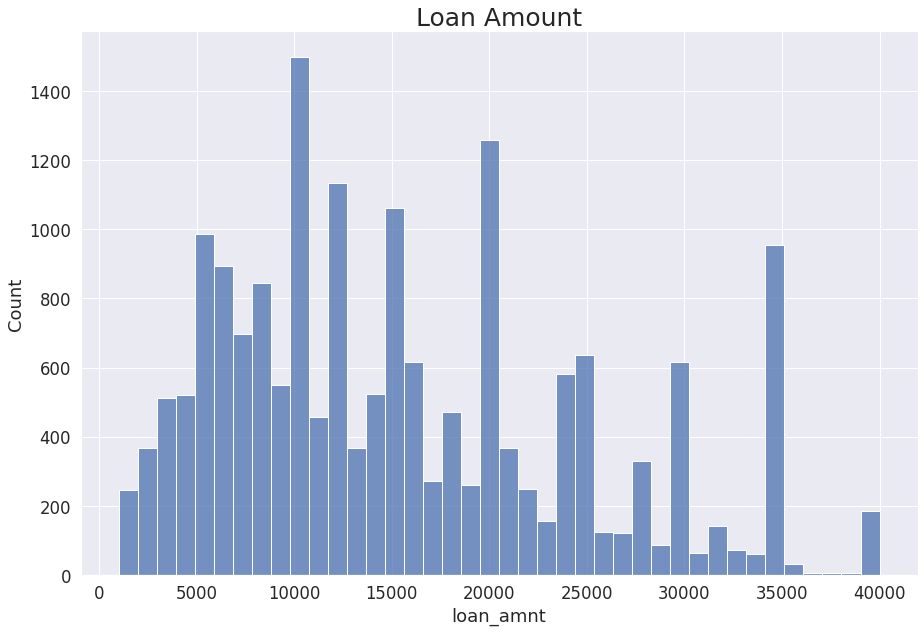

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df.loan_amnt)
plt.title('Loan Amount', fontsize = 25)
plt.show()

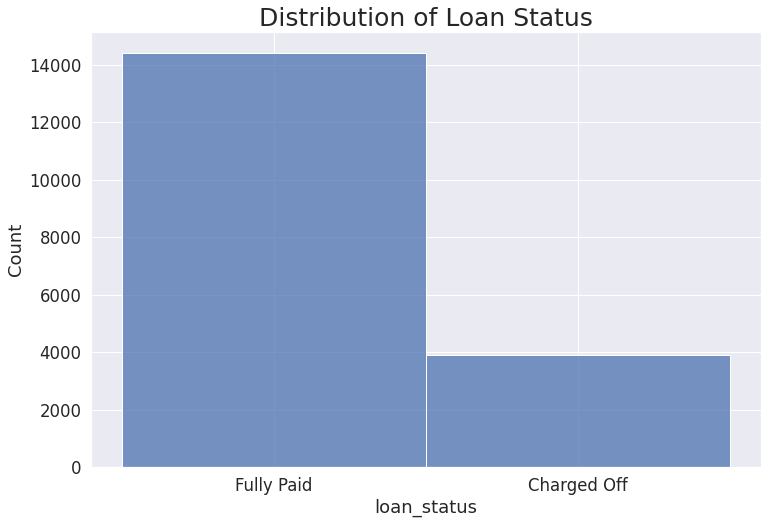

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df.loan_status)
plt.title('Distribution of Loan Status', fontsize = 25)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18324 entries, 0 to 18323
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18324 non-null  int64  
 1   addr_state              18324 non-null  object 
 2   annual_inc              18324 non-null  float64
 3   emp_length              17150 non-null  float64
 4   emp_title               17042 non-null  object 
 5   home_ownership          18324 non-null  object 
 6   installment             18324 non-null  float64
 7   loan_amnt               18324 non-null  int64  
 8   purpose                 18324 non-null  object 
 9   term                    18324 non-null  int64  
 10  int_rate                18324 non-null  float64
 11  avg_cur_bal             17758 non-null  float64
 12  inq_last_12m            9395 non-null   float64
 13  max_bal_bc              9395 non-null   float64
 14  mo_sin_old_il_acct      17192 non-null

In [ ]:
 # Home ownership and loan status

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    8880
RENT        7382
OWN         2048
ANY           13
OTHER          1
Name: home_ownership, dtype: int64

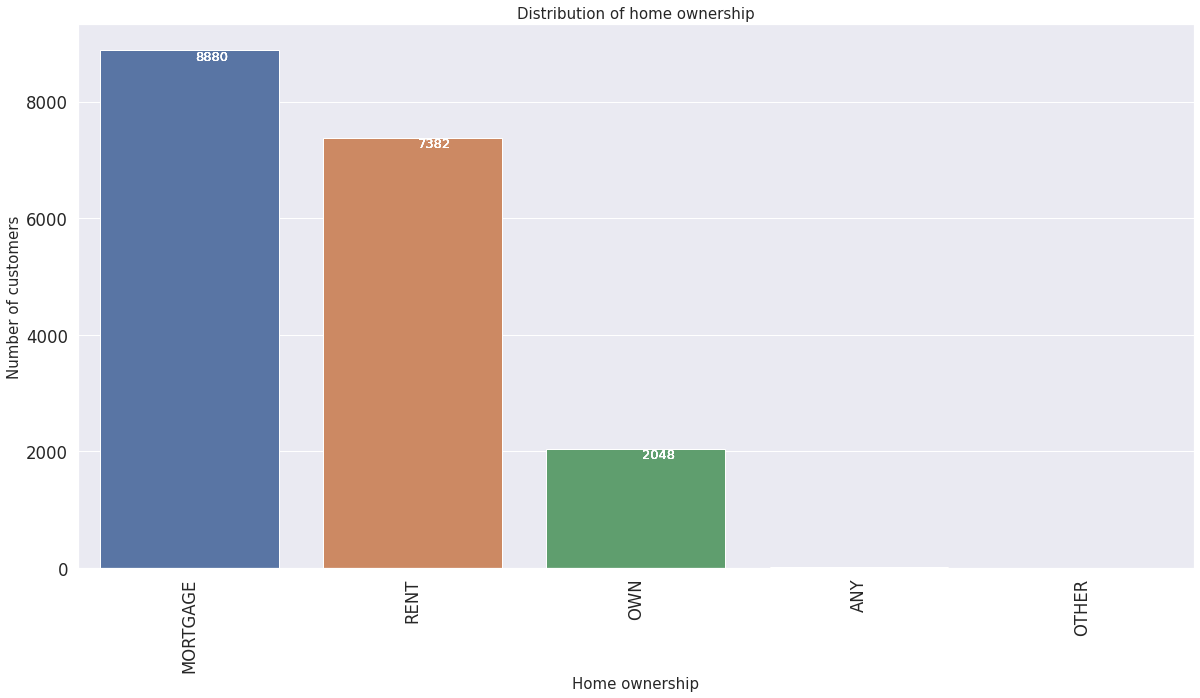

In [ ]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='home_ownership', data=df)
ax.set_title('Distribution of home ownership' , fontsize = 15)
plt.xlabel('Home ownership', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='vertical')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x()+0.5, p.get_height()), ha='center', va='top', color='white', size=13)

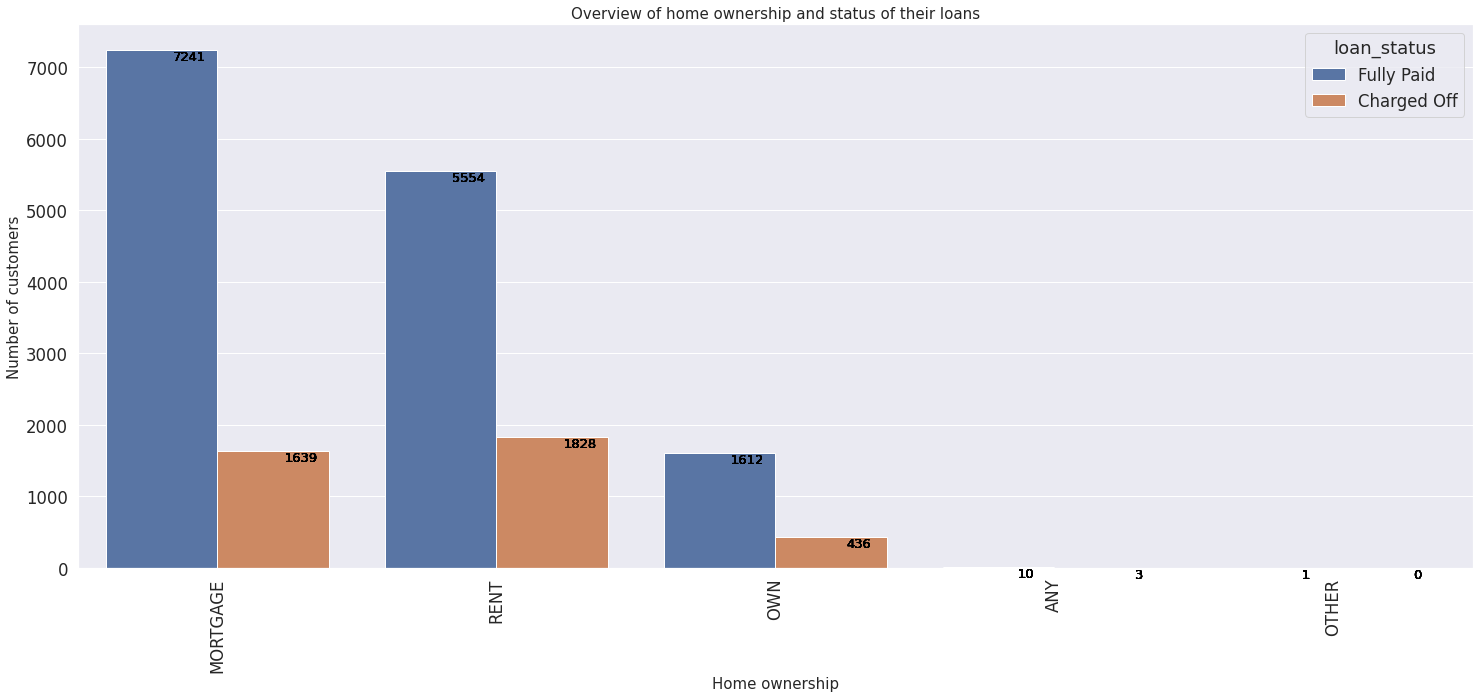

In [ ]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x='home_ownership',hue ='loan_status', data=df)
ax.set_title('Overview of home ownership and status of their loans' , fontsize = 15)
plt.xlabel('Home ownership', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='vertical')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='black',  size=13)
        



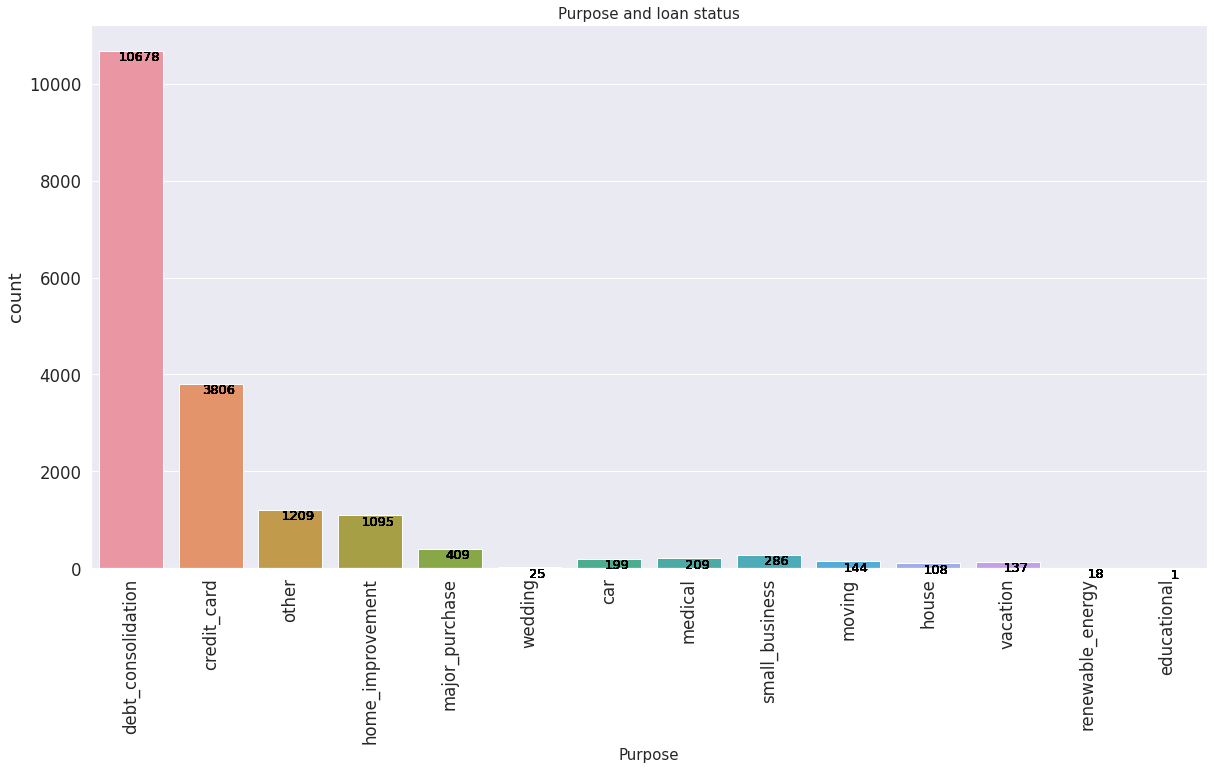

In [ ]:
 # purpose and loan status

plt.figure(figsize=(20,10))
ax=sns.countplot(x='purpose', data=df)
ax.set_title('Purpose and loan status' , fontsize = 15)
plt.xlabel('Purpose', fontsize=15)
plt.xticks(rotation='vertical')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x()+0.5, p.get_height()), ha='center', va='top', color='black', size=13)

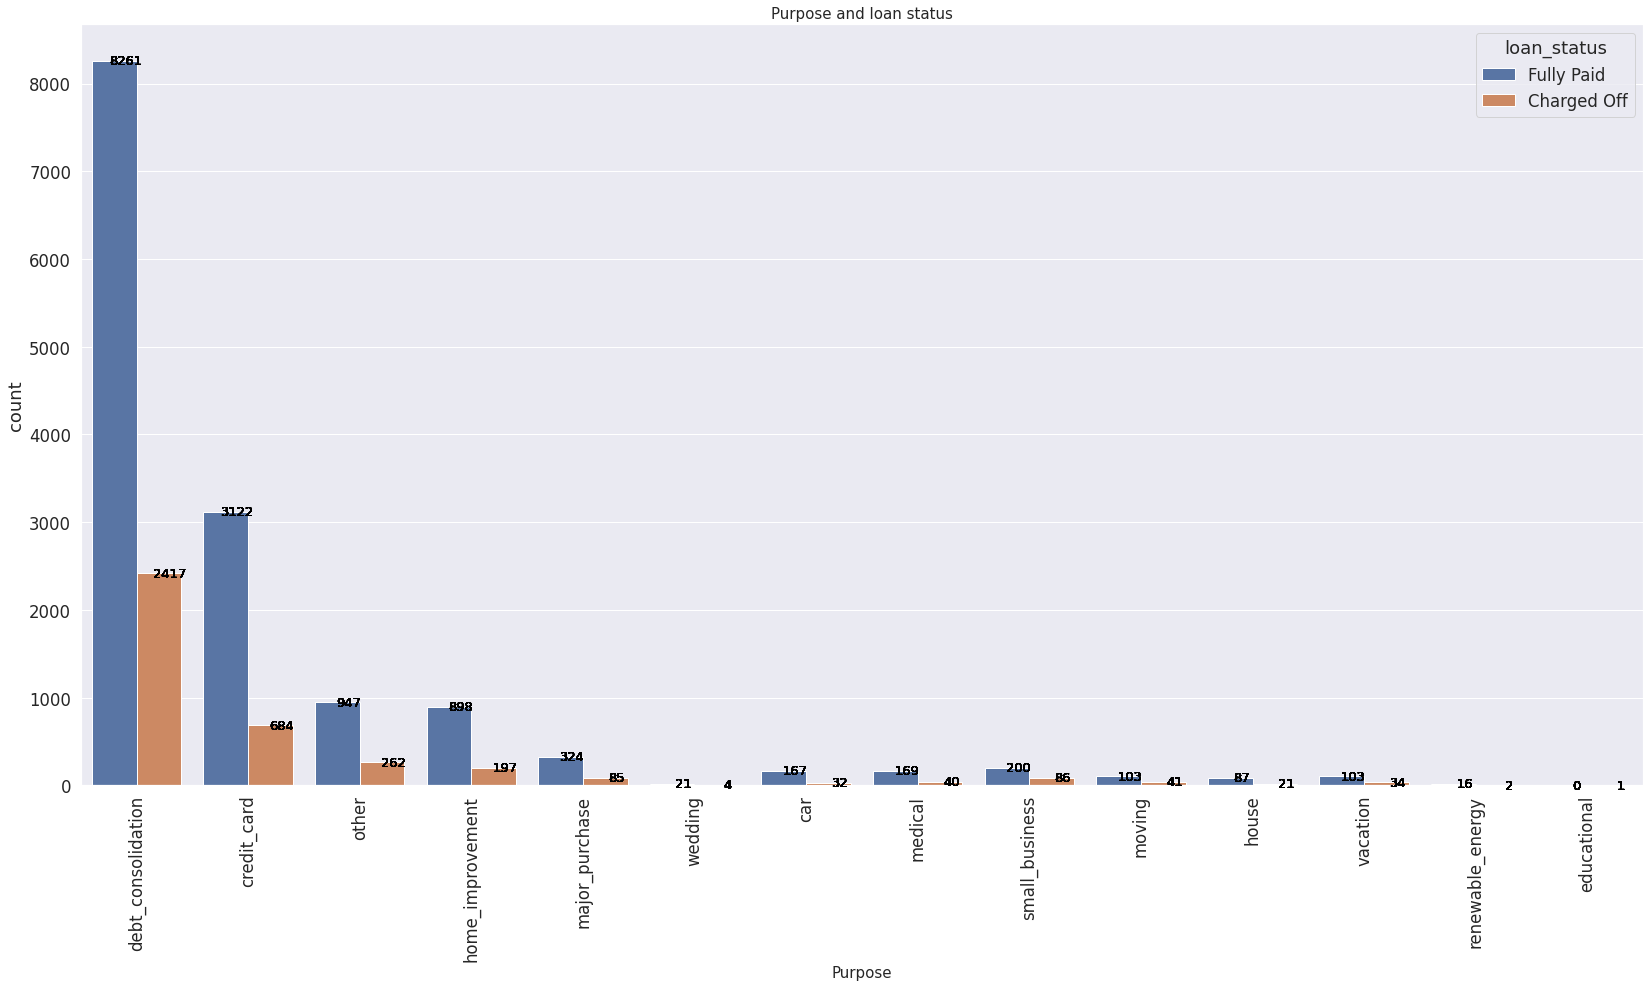

In [ ]:
plt.figure(figsize=(28,14))
ax=sns.countplot(x='purpose', hue='loan_status', data=df)
ax.set_title('Purpose and loan status' , fontsize = 15)
plt.xlabel('Purpose', fontsize=15)
plt.xticks(rotation='vertical')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x()+0.3, p.get_height()), ha='center', va='center', color='black', size=13)

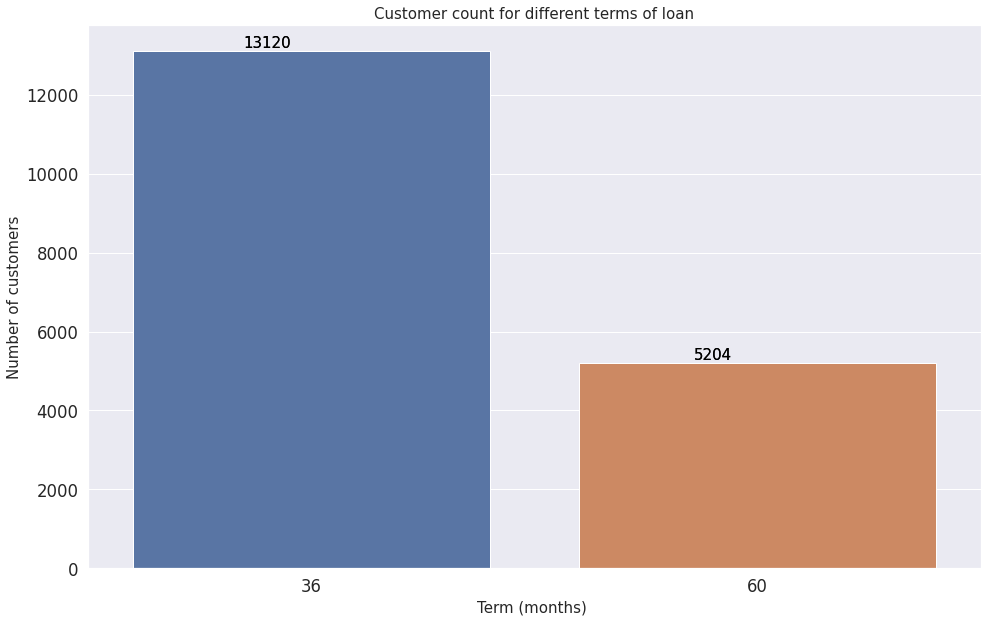

In [ ]:
 # term and loan status

plt.figure(figsize=(16,10))
ax=sns.countplot(x='term', data=df)
ax.set_title('Customer count for different terms of loan' , fontsize = 15)
plt.xlabel('Term (months) ', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

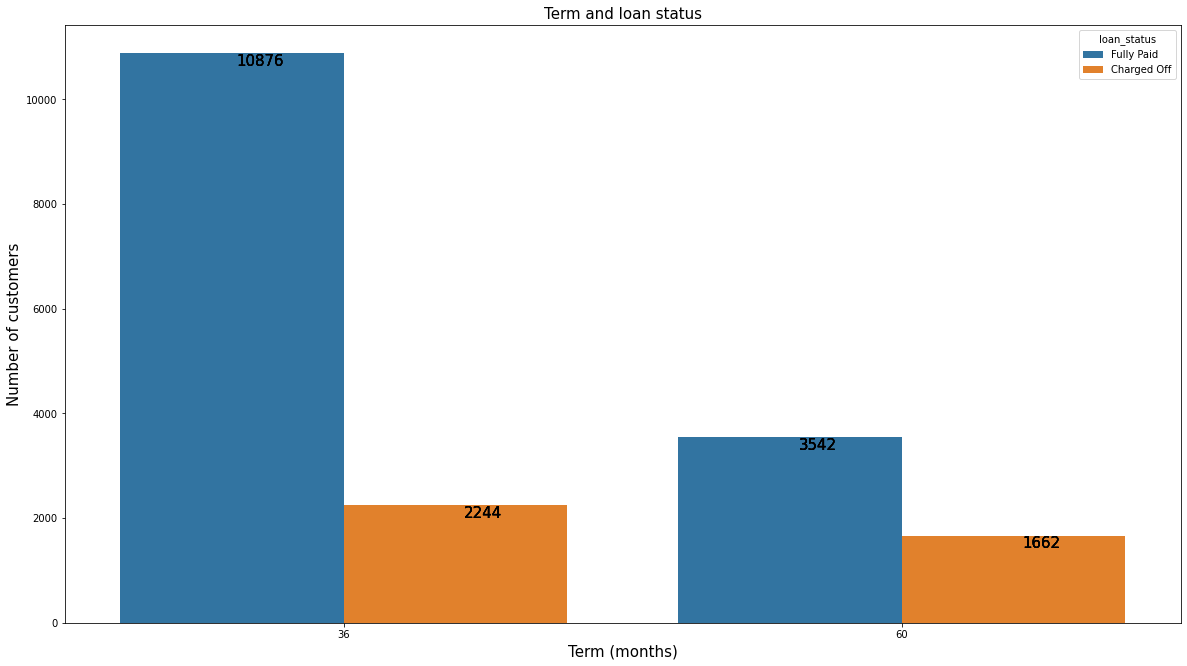

In [ ]:
 # term and loan status

plt.figure(figsize=(20,11))
ax=sns.countplot(x='term', hue='loan_status', data=df)
ax.set_title('Term and loan status' , fontsize = 15)
plt.xlabel('Term (months)', fontsize=15)
plt.ylabel('Number of customers', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x()+0.25, p.get_height()), ha='center', va='top', color='black', size=15)
        

In [ ]:
# To put the loan amount in bins
bins = pd.cut(df['loan_amnt'], 5)


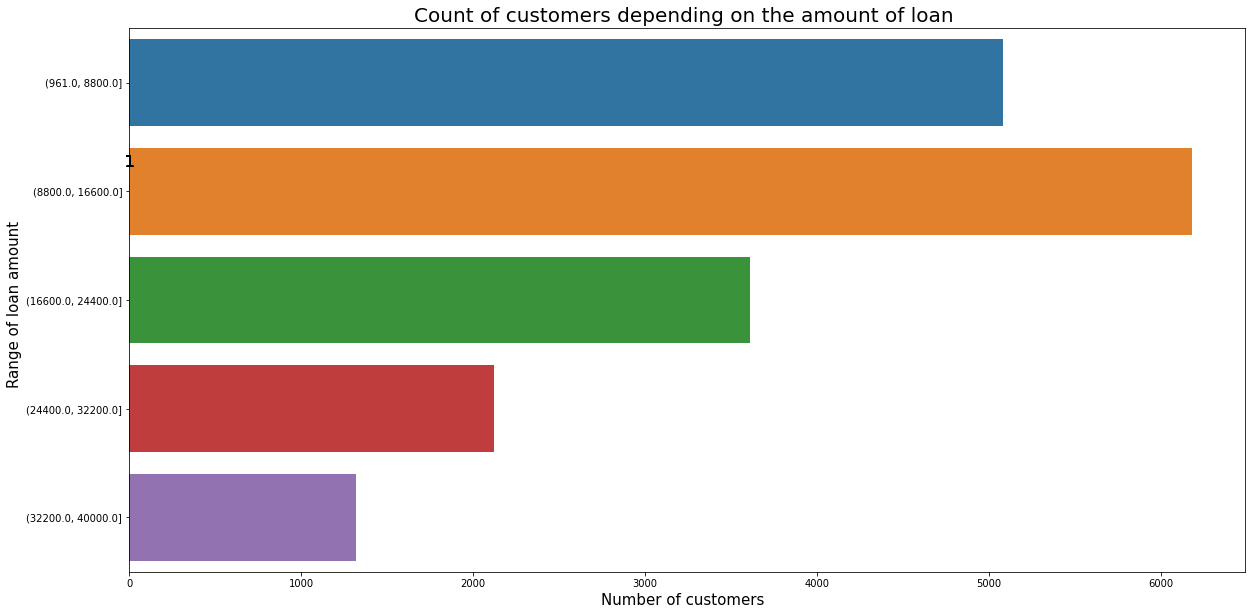

In [ ]:
 # loan status

plt.figure(figsize=(20,10))
ax=sns.countplot(y=bins)
sns.set(font_scale=1.5)
ax.set_title('Count of customers depending on the amount of loan ' , fontsize = 20)
plt.xlabel('Number of customers  ', fontsize=15)
plt.ylabel('Range of loan amount  ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

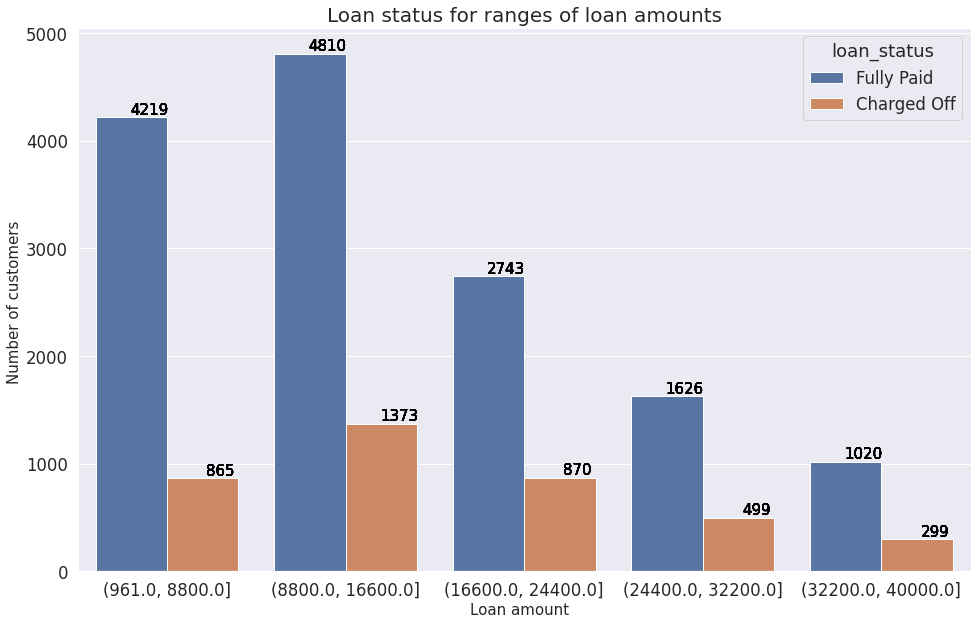

In [ ]:
 # loan amount and loan status

plt.figure(figsize=(16,10))
sns.set(font_scale=1.5)
ax=sns.countplot(x=bins,  hue='loan_status', data=df)
ax.set_title('Loan status for ranges of loan amounts' , fontsize = 20)
plt.xlabel('Loan amount  ', fontsize=15)
plt.ylabel('Number of customers ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

In [ ]:
# Bin interest rate
# To put the loan amount in bins
bins2 = pd.cut(df['int_rate'], 6)

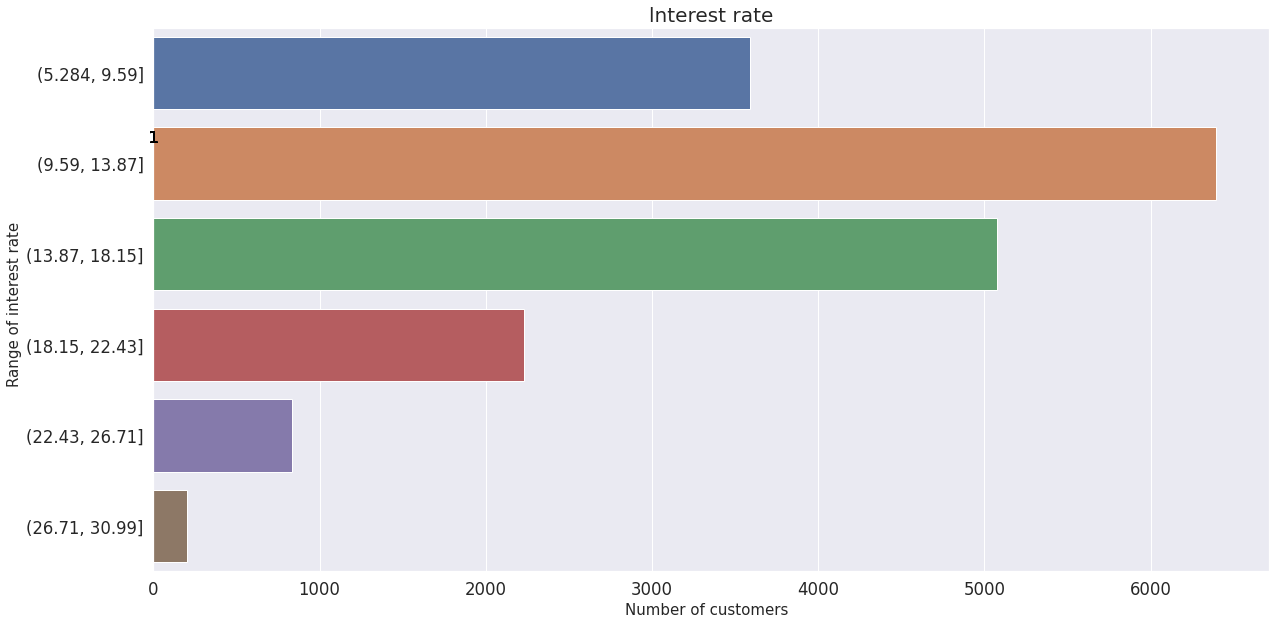

In [ ]:
 # interest rate

plt.figure(figsize=(20,10))
ax=sns.countplot(y=bins2)
sns.set(font_scale=1.5)
ax.set_title('lnterest rate' , fontsize = 20)
plt.xlabel('Number of customers  ', fontsize=15)
plt.ylabel('Range of interest rate  ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

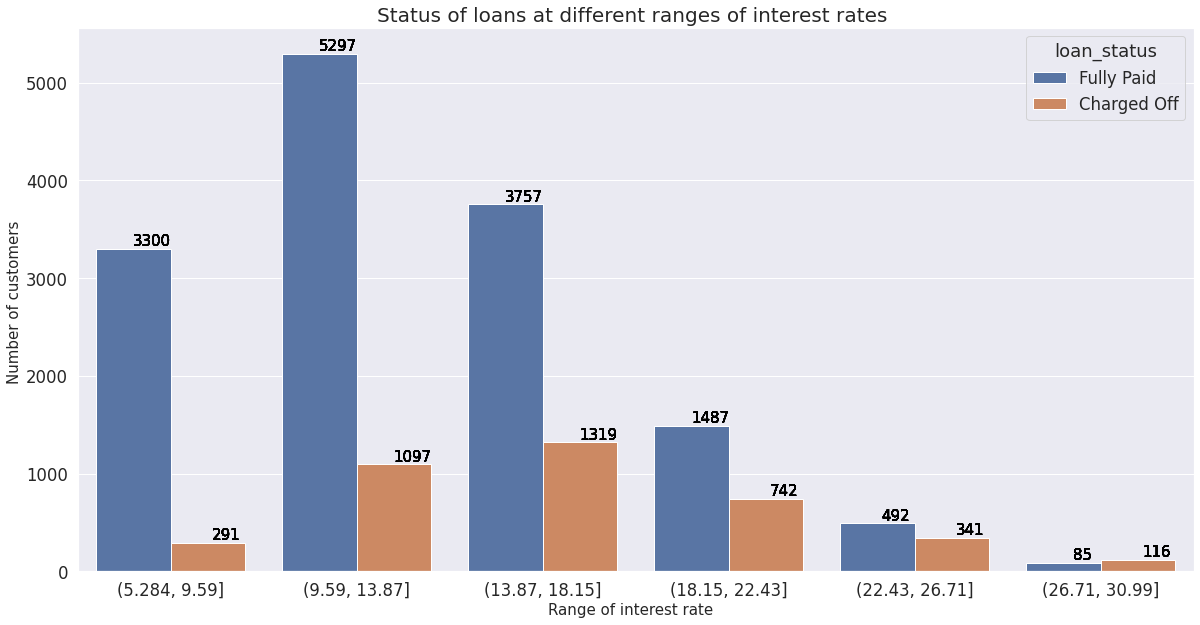

In [ ]:
# interest rate and loan status

plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
ax=sns.countplot(x=bins2,  hue='loan_status', data=df)
ax.set_title('Status of loans at different ranges of interest rates ' , fontsize = 20)
plt.xlabel('Range of interest rate  ', fontsize=15)
plt.ylabel('Number of customers ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

In [ ]:
# Bin average 
# To put the average current balance in bins
bins3 = pd.cut(df['avg_cur_bal'], 10)

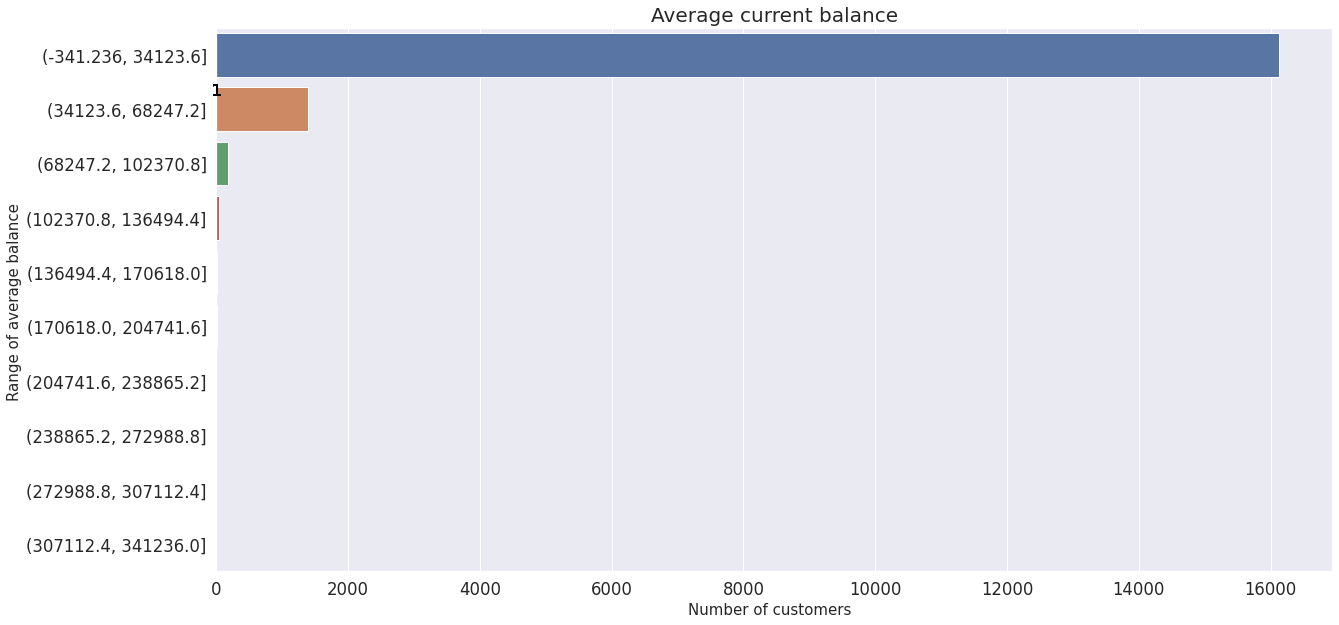

In [ ]:
 # average balance

plt.figure(figsize=(20,10))
ax=sns.countplot(y=bins3)
sns.set(font_scale=1.5)
ax.set_title('Average current balance' , fontsize = 20)
plt.xlabel('Number of customers  ', fontsize=15)
plt.ylabel('Range of average balance ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

In [ ]:
# Bin current balance 
# To put the average current balance in bins
bins4 = pd.cut(df['mths_since_last_delinq'], 10)

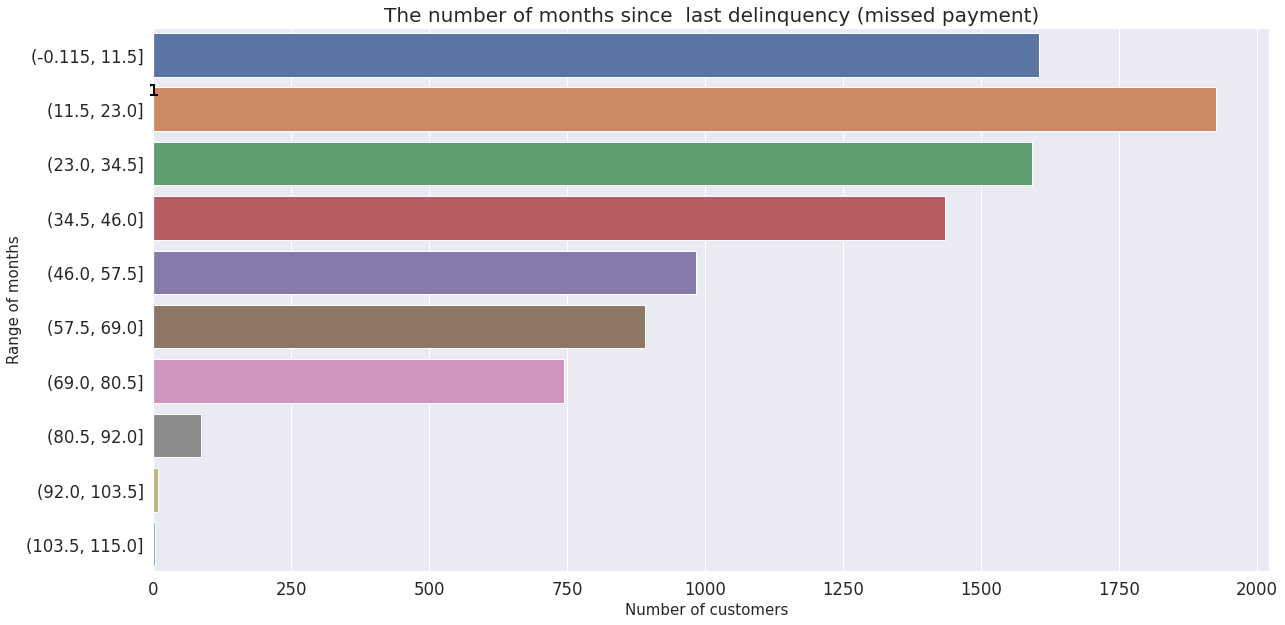

In [ ]:
 # average balance

plt.figure(figsize=(20,10))
ax=sns.countplot(y=bins4)
sns.set(font_scale=1.5)
ax.set_title('The number of months since  last delinquency (missed payment)' , fontsize = 20)
plt.xlabel('Number of customers  ', fontsize=15)
plt.ylabel('Range of months', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

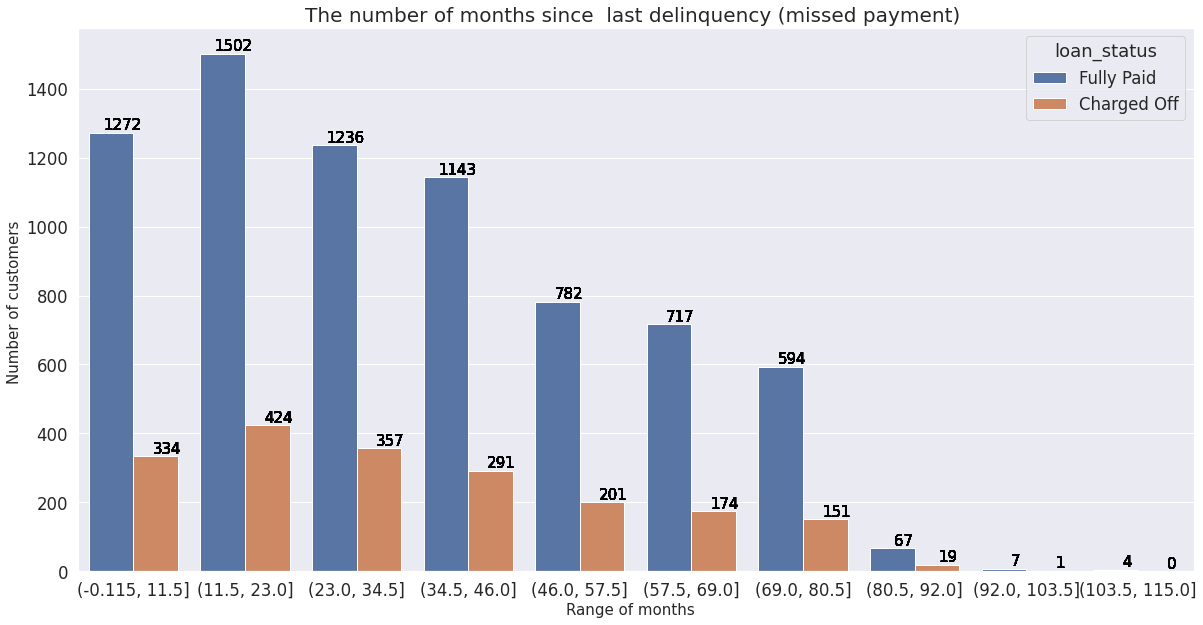

In [ ]:

plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
ax=sns.countplot(x=bins4,  hue='loan_status', data=df)
ax.set_title('The number of months since  last delinquency (missed payment) ' , fontsize = 20)
plt.xlabel('Range of months  ', fontsize=15)
plt.ylabel('Number of customers ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

In [ ]:
df.nunique()

id                        18324
addr_state                   51
annual_inc                 2434
emp_length                   11
emp_title                 10040
home_ownership                5
installment               10246
loan_amnt                  1111
purpose                      14
term                          2
int_rate                    465
avg_cur_bal               12635
inq_last_12m                 25
max_bal_bc                 6440
mo_sin_old_il_acct          355
mo_sin_old_rev_tl_op        564
mo_sin_rcnt_rev_tl_op       150
mo_sin_rcnt_tl              100
mort_acc                     23
mths_since_last_delinq       98
num_bc_tl                    43
num_il_tl                    64
num_op_rev_tl                44
num_tl_90g_dpd_24m           11
num_tl_op_past_12m           20
open_acc                     49
percent_bc_gt_75            111
pub_rec_bankruptcies          7
total_acc                    93
total_bal_ex_mort         16450
loan_status                   2
dtype: i

In [ ]:
df.describe()

,id,annual_inc,emp_length,installment,loan_amnt,term,int_rate,avg_cur_bal,inq_last_12m,max_bal_bc,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort
count,1.832400e+04,1.832400e+04,17150.000000,18324.000000,18324.000000,18324.000000,18324.000000,17758.000000,9395.000000,9395.000000,...,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,18324.000000,17714.000000,18324.000000,18324.000000,1.792600e+04
mean,6.832645e+07,8.017611e+04,6.073178,467.543006,15522.661537,42.815979,13.850700,13466.600011,2.301863,5728.533475,...,7.964752,8.575619,8.268525,0.086092,2.274775,11.629284,45.489228,0.142054,24.750109,5.148915e+04
std,4.245703e+07,6.487345e+04,3.639694,278.099801,9349.294243,10.822769,4.822253,16550.730832,2.523087,5628.027589,...,4.847990,7.372691,4.627181,0.440718,1.936068,5.578496,35.907408,0.388198,12.192517,4.970348e+04
min,3.009180e+05,3.000000e+03,0.500000,30.650000,1000.000000,36.000000,5.310000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000e+00
25%,3.491424e+07,4.700000e+04,2.000000,259.302500,8000.000000,36.000000,10.490000,3129.000000,1.000000,2170.500000,...,4.000000,3.000000,5.000000,0.000000,1.000000,8.000000,12.500000,0.000000,16.000000,2.151850e+04
50%,6.838023e+07,6.500000e+04,6.000000,397.480000,14000.000000,36.000000,13.330000,7137.000000,2.000000,4244.000000,...,7.000000,7.000000,7.000000,0.000000,2.000000,11.000000,44.400000,0.000000,23.000000,3.897700e+04
75%,9.730784e+07,9.500000e+04,10.000000,635.720000,21000.000000,60.000000,16.990000,18436.500000,3.000000,7357.000000,...,10.000000,11.000000,11.000000,0.000000,3.000000,14.000000,75.000000,0.000000,32.000000,6.526700e+04
max,1.708249e+08,2.616000e+06,10.000000,1503.890000,40000.000000,60.000000,30.990000,341236.000000,28.000000,99609.000000,...,45.000000,78.000000,49.000000,10.000000,22.000000,50.000000,100.000000,6.000000,110.000000,1.501187e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18324 entries, 0 to 18323
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18324 non-null  int64  
 1   addr_state              18324 non-null  object 
 2   annual_inc              18324 non-null  float64
 3   emp_length              17150 non-null  float64
 4   emp_title               17042 non-null  object 
 5   home_ownership          18324 non-null  object 
 6   installment             18324 non-null  float64
 7   loan_amnt               18324 non-null  int64  
 8   purpose                 18324 non-null  object 
 9   term                    18324 non-null  int64  
 10  int_rate                18324 non-null  float64
 11  avg_cur_bal             17758 non-null  float64
 12  inq_last_12m            9395 non-null   float64
 13  max_bal_bc              9395 non-null   float64
 14  mo_sin_old_il_acct      17192 non-null

<Axes: >

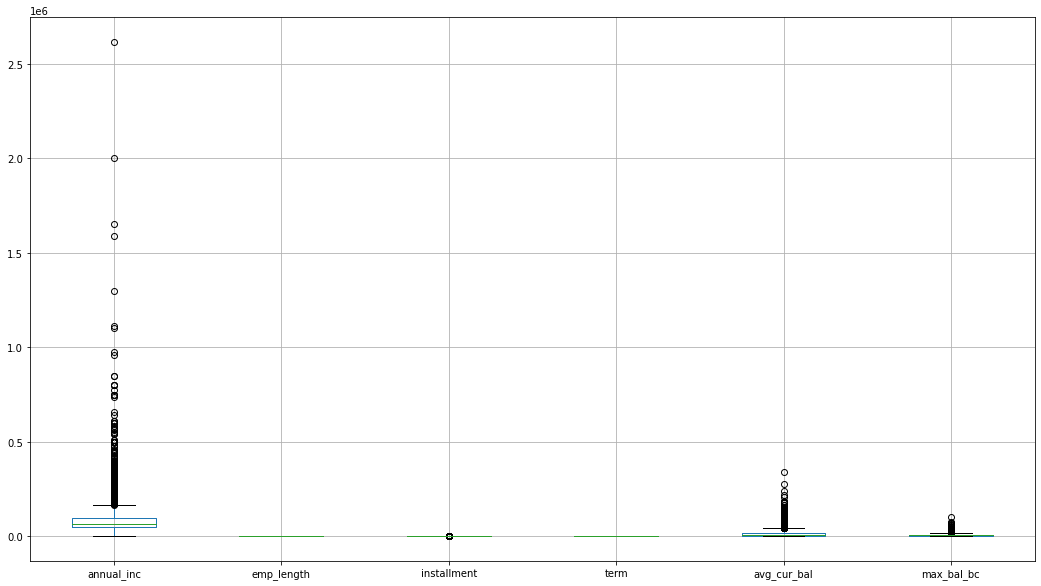

In [ ]:

plt.figure(figsize=(18,10))
df.boxplot(column=['annual_inc','emp_length','installment','term','avg_cur_bal','max_bal_bc'], return_type='axes')

In [ ]:
# now our data has no missing values, we can ahead to scale our data and train our model. 
# For this we will use KNN as the first model and Neural Networks for the second

<Axes: >

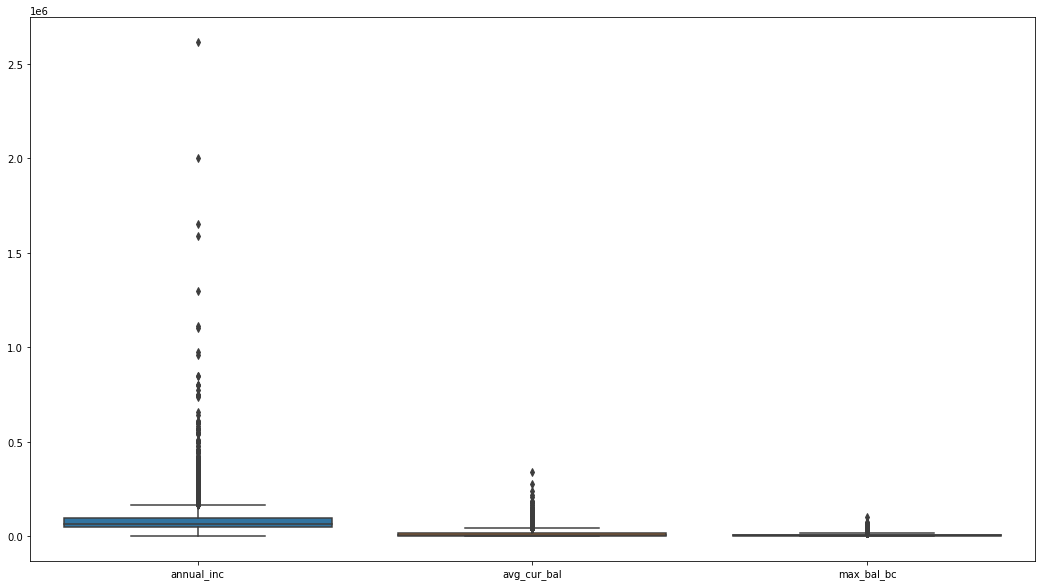

In [ ]:
plt.figure(figsize=(18,10))
sns.boxplot(data=df[['annual_inc','avg_cur_bal','max_bal_bc']])

In [ ]:
#ML

In [ ]:
data.describe()

,id,annual_inc,emp_length,installment,loan_amnt,term,int_rate,avg_cur_bal,inq_last_12m,max_bal_bc,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort
count,1.832400e+04,1.832400e+04,17150.000000,18324.000000,18324.000000,18324.000000,18324.000000,17758.000000,9395.000000,9395.000000,...,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,18324.000000,17714.000000,18324.000000,18324.000000,1.792600e+04
mean,6.832645e+07,8.017611e+04,6.073178,467.543006,15522.661537,42.815979,13.850700,13466.600011,2.301863,5728.533475,...,7.964752,8.575619,8.268525,0.086092,2.274775,11.629284,45.489228,0.142054,24.750109,5.148915e+04
std,4.245703e+07,6.487345e+04,3.639694,278.099801,9349.294243,10.822769,4.822253,16550.730832,2.523087,5628.027589,...,4.847990,7.372691,4.627181,0.440718,1.936068,5.578496,35.907408,0.388198,12.192517,4.970348e+04
min,3.009180e+05,3.000000e+03,0.500000,30.650000,1000.000000,36.000000,5.310000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000e+00
25%,3.491424e+07,4.700000e+04,2.000000,259.302500,8000.000000,36.000000,10.490000,3129.000000,1.000000,2170.500000,...,4.000000,3.000000,5.000000,0.000000,1.000000,8.000000,12.500000,0.000000,16.000000,2.151850e+04
50%,6.838023e+07,6.500000e+04,6.000000,397.480000,14000.000000,36.000000,13.330000,7137.000000,2.000000,4244.000000,...,7.000000,7.000000,7.000000,0.000000,2.000000,11.000000,44.400000,0.000000,23.000000,3.897700e+04
75%,9.730784e+07,9.500000e+04,10.000000,635.720000,21000.000000,60.000000,16.990000,18436.500000,3.000000,7357.000000,...,10.000000,11.000000,11.000000,0.000000,3.000000,14.000000,75.000000,0.000000,32.000000,6.526700e+04
max,1.708249e+08,2.616000e+06,10.000000,1503.890000,40000.000000,60.000000,30.990000,341236.000000,28.000000,99609.000000,...,45.000000,78.000000,49.000000,10.000000,22.000000,50.000000,100.000000,6.000000,110.000000,1.501187e+06


In [ ]:
 # To drop the 'Id' column
data = data.drop('id', axis=1)


In [ ]:
data.head()

,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,int_rate,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,CA,72000.0,3.0,CA. Dept. Of Corrections,MORTGAGE,395.66,12000,debt_consolidation,36,11.49,...,NaN,NaN,NaN,NaN,16,NaN,0,23,NaN,Fully Paid
1,TX,97500.0,1.0,Curriculum & Implementation Manager,RENT,966.47,35000,debt_consolidation,60,21.99,...,2.0,12.0,0.0,1.0,13,87.5,0,24,84227.0,Fully Paid
2,NY,120000.0,1.0,Senior manager,RENT,806.57,25000,credit_card,36,9.99,...,2.0,7.0,0.0,1.0,8,100.0,0,16,39124.0,Fully Paid
3,CA,130000.0,10.0,Border Patrol Agent,RENT,846.17,25225,debt_consolidation,36,12.69,...,9.0,3.0,0.0,2.0,8,50.0,0,24,123331.0,Fully Paid
4,TX,58296.0,10.0,Account Manager,MORTGAGE,41.79,1200,other,36,15.31,...,7.0,6.0,0.0,0.0,9,100.0,0,17,51794.0,Fully Paid


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18324 entries, 0 to 18323
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18324 non-null  int64  
 1   addr_state              18324 non-null  object 
 2   annual_inc              18324 non-null  float64
 3   emp_length              17150 non-null  float64
 4   emp_title               17042 non-null  object 
 5   home_ownership          18324 non-null  object 
 6   installment             18324 non-null  float64
 7   loan_amnt               18324 non-null  int64  
 8   purpose                 18324 non-null  object 
 9   term                    18324 non-null  int64  
 10  int_rate                18324 non-null  float64
 11  avg_cur_bal             17758 non-null  float64
 12  inq_last_12m            9395 non-null   float64
 13  max_bal_bc              9395 non-null   float64
 14  mo_sin_old_il_acct      17192 non-null

In [ ]:
data.isna().sum()

id                           0
addr_state                   0
annual_inc                   0
emp_length                1174
emp_title                 1282
home_ownership               0
installment                  0
loan_amnt                    0
purpose                      0
term                         0
int_rate                     0
avg_cur_bal                566
inq_last_12m              8929
max_bal_bc                8929
mo_sin_old_il_acct        1132
mo_sin_old_rev_tl_op       564
mo_sin_rcnt_rev_tl_op      564
mo_sin_rcnt_tl             564
mort_acc                   398
mths_since_last_delinq    9048
num_bc_tl                  564
num_il_tl                  564
num_op_rev_tl              564
num_tl_90g_dpd_24m         564
num_tl_op_past_12m         564
open_acc                     0
percent_bc_gt_75           610
pub_rec_bankruptcies         0
total_acc                    0
total_bal_ex_mort          398
loan_status                  0
dtype: int64

In [ ]:
df2=data

In [ ]:
# Drop missing values only in the 'emp_title' column
df2.dropna(subset=['emp_title'], inplace=True)

In [ ]:
df2.isna().sum()

addr_state                   0
annual_inc                   0
emp_length                   5
emp_title                    0
home_ownership               0
installment                  0
loan_amnt                    0
purpose                      0
term                         0
int_rate                     0
avg_cur_bal                528
inq_last_12m              8258
max_bal_bc                8258
mo_sin_old_il_acct         989
mo_sin_old_rev_tl_op       527
mo_sin_rcnt_rev_tl_op      527
mo_sin_rcnt_tl             527
mort_acc                   369
mths_since_last_delinq    8335
num_bc_tl                  527
num_il_tl                  527
num_op_rev_tl              527
num_tl_90g_dpd_24m         527
num_tl_op_past_12m         527
open_acc                     0
percent_bc_gt_75           552
pub_rec_bankruptcies         0
total_acc                    0
total_bal_ex_mort          369
loan_status                  0
dtype: int64

In [ ]:
df2.head()

,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,int_rate,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,CA,72000.0,3.0,CA. Dept. Of Corrections,MORTGAGE,395.66,12000,debt_consolidation,36,11.49,...,NaN,NaN,NaN,NaN,16,NaN,0,23,NaN,Fully Paid
1,TX,97500.0,1.0,Curriculum & Implementation Manager,RENT,966.47,35000,debt_consolidation,60,21.99,...,2.0,12.0,0.0,1.0,13,87.5,0,24,84227.0,Fully Paid
2,NY,120000.0,1.0,Senior manager,RENT,806.57,25000,credit_card,36,9.99,...,2.0,7.0,0.0,1.0,8,100.0,0,16,39124.0,Fully Paid
3,CA,130000.0,10.0,Border Patrol Agent,RENT,846.17,25225,debt_consolidation,36,12.69,...,9.0,3.0,0.0,2.0,8,50.0,0,24,123331.0,Fully Paid
4,TX,58296.0,10.0,Account Manager,MORTGAGE,41.79,1200,other,36,15.31,...,7.0,6.0,0.0,0.0,9,100.0,0,17,51794.0,Fully Paid


In [ ]:
# Identify columns with missing values
missing_cols = df2.columns[df2.isnull().any()]

In [ ]:
missing_cols

Index(['emp_length', 'avg_cur_bal', 'inq_last_12m', 'max_bal_bc',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'percent_bc_gt_75', 'total_bal_ex_mort'],
      dtype='object')

In [ ]:
li=list(missing_cols)

In [ ]:
li

['emp_length',
 'avg_cur_bal',
 'inq_last_12m',
 'max_bal_bc',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_last_delinq',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'percent_bc_gt_75',
 'total_bal_ex_mort']

In [ ]:
# replace missing values using KNN imputation
# instantitating KNN imputer
imputer = KNNImputer(n_neighbors=5)


In [ ]:


df2[li] = imputer.fit_transform(df2[li])

In [ ]:
df2.isna().sum()

addr_state                0
annual_inc                0
emp_length                0
emp_title                 0
home_ownership            0
installment               0
loan_amnt                 0
purpose                   0
term                      0
int_rate                  0
avg_cur_bal               0
inq_last_12m              0
max_bal_bc                0
mo_sin_old_il_acct        0
mo_sin_old_rev_tl_op      0
mo_sin_rcnt_rev_tl_op     0
mo_sin_rcnt_tl            0
mort_acc                  0
mths_since_last_delinq    0
num_bc_tl                 0
num_il_tl                 0
num_op_rev_tl             0
num_tl_90g_dpd_24m        0
num_tl_op_past_12m        0
open_acc                  0
percent_bc_gt_75          0
pub_rec_bankruptcies      0
total_acc                 0
total_bal_ex_mort         0
loan_status               0
dtype: int64

In [ ]:
df3=df2

In [ ]:
df3.shape

(17042, 30)

In [ ]:
df3['loan_status'].value_counts(normalize=True)

Fully Paid     0.789872
Charged Off    0.210128
Name: loan_status, dtype: float64

In [ ]:
# handle class imbalance using oversampling
X = df3.drop('loan_status', axis=1)
y = df3['loan_status']
sampler = RandomOverSampler()
X_resampled, y_resampled = sampler.fit_resample(X, y)



In [ ]:
X_resampled.shape

(26922, 29)

In [ ]:
y_resampled.shape

(26922,)

In [ ]:

y_resampled.value_counts(normalize=True)

Fully Paid     0.5
Charged Off    0.5
Name: loan_status, dtype: float64

<Axes: title={'center': 'Class Balance'}, xlabel='loan_status', ylabel='count'>

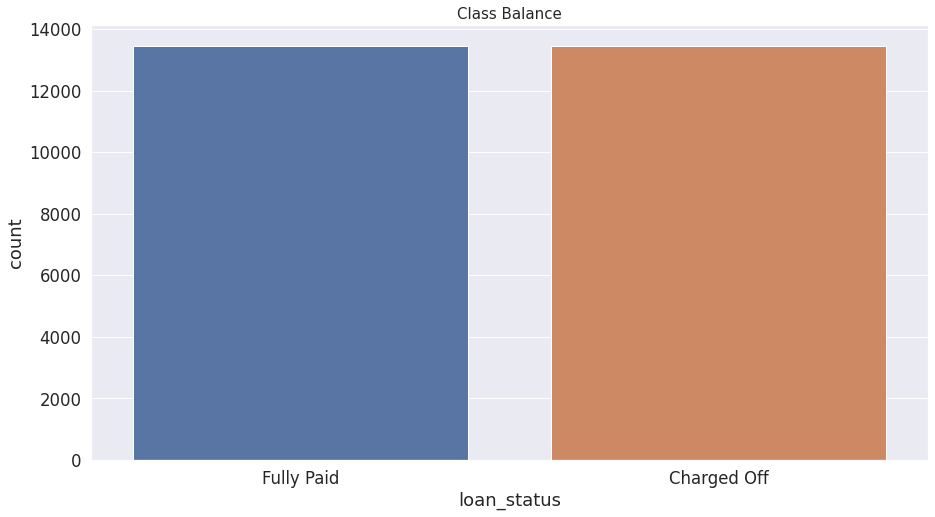

In [ ]:

plt.figure(figsize=(15,8))
plt.title('Class Balance', fontsize=15)
sns.countplot(x= y_resampled)

In [ ]:
#Encoding
# encode categorical variables
le = LabelEncoder()
for col in X_resampled.select_dtypes(include='object'):
    X_resampled[col] = le.fit_transform(X_resampled[col])


In [ ]:
X_resampled.head()

,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,int_rate,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort
0,4,72000.0,3.0,1063,1,395.66,12000,2,36,11.49,...,5.8,12.8,7.6,0.2,2.8,16,40.94,0,23,76495.8
1,43,97500.0,1.0,2003,4,966.47,35000,2,60,21.99,...,14.0,2.0,12.0,0.0,1.0,13,87.50,0,24,84227.0
2,34,120000.0,1.0,7194,4,806.57,25000,1,36,9.99,...,11.0,2.0,7.0,0.0,1.0,8,100.00,0,16,39124.0
3,4,130000.0,10.0,901,4,846.17,25225,2,36,12.69,...,9.0,9.0,3.0,0.0,2.0,8,50.00,0,24,123331.0
4,43,58296.0,10.0,139,1,41.79,1200,9,36,15.31,...,7.0,7.0,6.0,0.0,0.0,9,100.00,0,17,51794.0


In [ ]:
y_resampled.tail()

26917    Charged Off
26918    Charged Off
26919    Charged Off
26920    Charged Off
26921    Charged Off
Name: loan_status, dtype: object

In [ ]:

# Replace categorical values in the outcome column
y_resampled = y_resampled.replace({'Fully Paid': 1, 'Charged Off': 0})

# Check the new values in the outcome column
print(y_resampled.unique())




[1 0]


In [ ]:
y_resampled.tail()

26917    0
26918    0
26919    0
26920    0
26921    0
Name: loan_status, dtype: int64

In [ ]:
X = X_resampled

In [ ]:
y = y_resampled


In [ ]:
corr = df3.corr()
corr

,annual_inc,emp_length,installment,loan_amnt,term,int_rate,avg_cur_bal,inq_last_12m,max_bal_bc,mo_sin_old_il_acct,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort
annual_inc,1.000000,0.068835,0.377717,0.384595,0.038419,-0.104523,0.352539,0.080676,0.318911,0.137034,...,0.162497,0.111519,0.099879,0.004313,0.042036,0.156759,-0.021835,-0.052023,0.206130,0.389251
emp_length,0.068835,1.000000,0.080613,0.096398,0.062969,-0.002952,0.093442,0.005957,0.056039,0.137137,...,0.121173,-0.040947,0.126780,-0.004037,0.017094,0.052934,0.027428,0.033679,0.109612,-0.005434
installment,0.377717,0.080613,1.000000,0.948106,0.120482,0.120168,0.209443,0.045250,0.318712,0.116125,...,0.215196,0.055027,0.180431,-0.026663,-0.018017,0.188582,0.035098,-0.085096,0.196611,0.266835
loan_amnt,0.384595,0.096398,0.948106,1.000000,0.372737,0.104367,0.232020,0.039641,0.333922,0.139547,...,0.229590,0.068794,0.185343,-0.031840,-0.043750,0.194865,0.018362,-0.091684,0.217637,0.279911
term,0.038419,0.062969,0.120482,0.372737,1.000000,0.401595,0.055051,0.041989,0.083068,0.062392,...,0.062381,0.061663,0.053358,-0.018277,-0.000340,0.061060,0.046950,-0.006292,0.094501,0.080590
int_rate,-0.104523,-0.002952,0.120168,0.104367,0.401595,1.000000,-0.088488,0.119741,-0.049110,-0.070956,...,-0.081592,0.022508,-0.007857,0.014077,0.187254,0.005213,0.207510,0.045652,-0.032388,0.004769
avg_cur_bal,0.352539,0.093442,0.209443,0.232020,0.055051,-0.088488,1.000000,0.059283,0.314146,0.128714,...,-0.031469,0.048670,-0.182657,0.013573,-0.048530,-0.105279,0.074519,-0.084268,0.062061,0.297780
inq_last_12m,0.080676,0.005957,0.045250,0.039641,0.041989,0.119741,0.059283,1.000000,-0.067231,0.031050,...,0.109437,0.136606,0.138043,0.010905,0.343958,0.167978,-0.089286,0.057725,0.187772,0.135577
max_bal_bc,0.318911,0.056039,0.318712,0.333922,0.083068,-0.049110,0.314146,-0.067231,1.000000,0.125304,...,0.148569,0.096711,0.079853,-0.040237,-0.062726,0.131810,0.162518,-0.115128,0.171360,0.413240
mo_sin_old_il_acct,0.137034,0.137137,0.116125,0.139547,0.062392,-0.070956,0.128714,0.031050,0.125304,1.000000,...,0.132261,0.353166,0.072768,0.068576,0.020332,0.156921,0.056253,0.043018,0.351940,0.217673


['loan_amnt', 'mo_sin_rcnt_tl', 'num_op_rev_tl', 'open_acc', 'open_acc', 'total_acc', 'total_acc', 'total_acc', 'total_acc', 'total_bal_ex_mort']


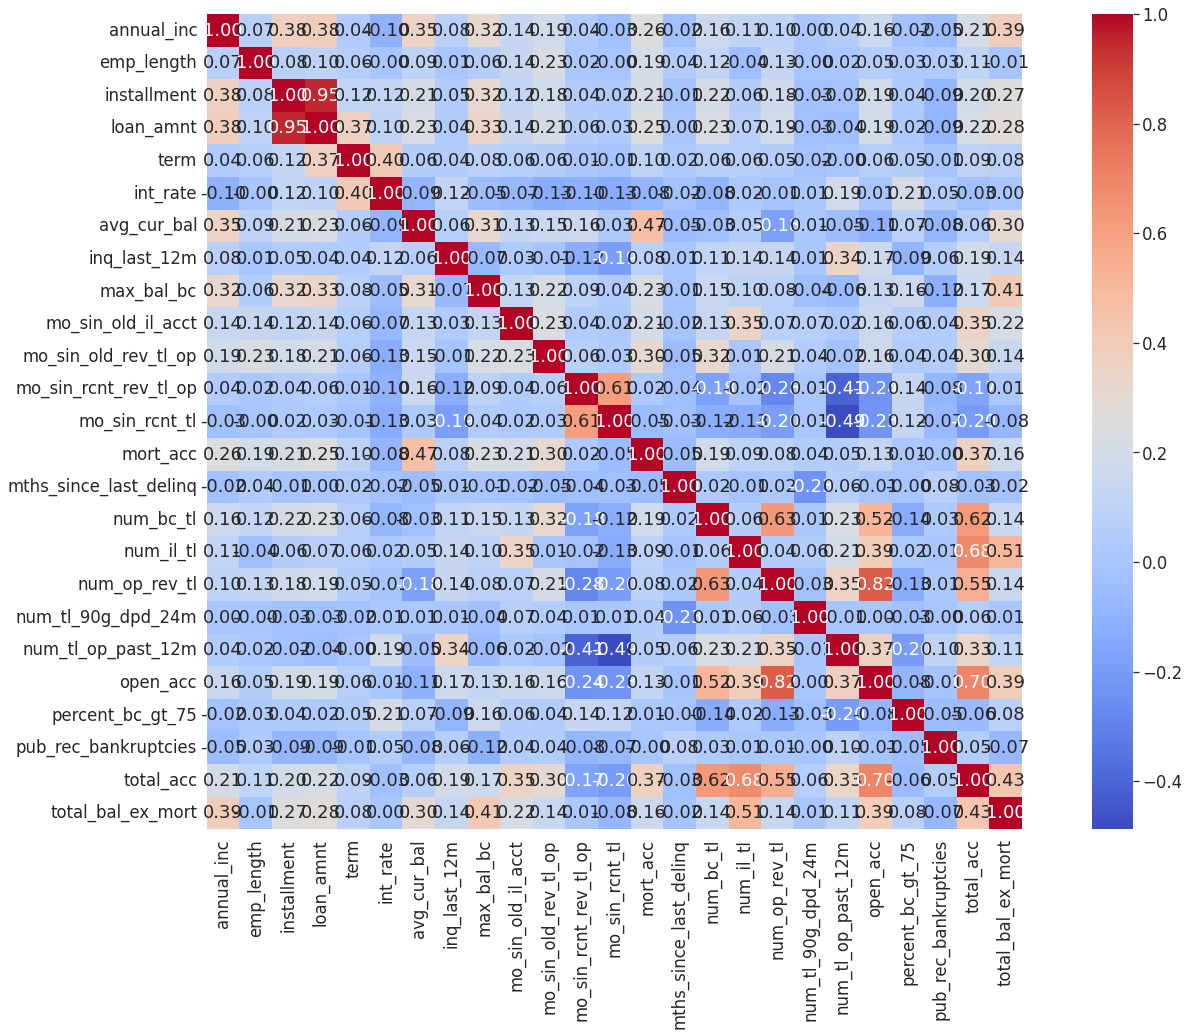

In [ ]:
#to get variables that are highly correlated
plt.figure(figsize=(25,15))

# Calculate the correlation matrix
corr = df3.corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True)

# Set a threshold for correlation coefficient
threshold = 0.5

# Find the highly correlated features
highly_correlated = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname = corr.columns[i]
            highly_correlated.append(colname)

# Drop the highly correlated features
#df.drop(highly_correlated, axis=1, inplace=True)
print(highly_correlated)



In [ ]:

print(highly_correlated)

['loan_amnt', 'mo_sin_rcnt_tl', 'num_op_rev_tl', 'open_acc', 'open_acc', 'total_acc', 'total_acc', 'total_acc', 'total_acc', 'total_bal_ex_mort']


In [ ]:
# Instantiate SelectKBest with f_classif as the scoring function
selector = SelectKBest(score_func=f_classif, k=10)

# Fit the selector to the data
selector.fit(X_resampled, y_resampled)

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_names = X_resampled.columns[selected_features_indices]

# Print the names of the selected features
print(selected_features_names)


Index(['annual_inc', 'home_ownership', 'loan_amnt', 'term', 'int_rate',
       'avg_cur_bal', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mort_acc', 'num_tl_op_past_12m'],
      dtype='object')


In [ ]:
# select the top K features using f_classic
kbest = SelectKBest(score_func=f_classif, k=10)
X_resampled = kbest.fit_transform(X_resampled, y_resampled)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3,random_state = 40)


In [ ]:


scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform (X_test)


In [ ]:


# train a decision tree classifier on the data
clf = DecisionTreeClassifier()

#clf = RandomForestClassifier()

clf.fit(X_train_sc, y_train)

# test the classifier on the test set and print the classification report
y_pred = clf.predict(X_test_sc)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.95      0.87      4053
           1       0.94      0.75      0.84      4024

    accuracy                           0.85      8077
   macro avg       0.87      0.85      0.85      8077
weighted avg       0.87      0.85      0.85      8077



In [ ]:

Accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score:%.2f\n\n'%(Accuracy))
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('The confusion matrix is:')
print(conf_matrix,'\n\n')
print('---------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy score:0.85


The confusion matrix is:
[[3867  186]
 [1001 3023]] 


---------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.95      0.87      4053
           1       0.94      0.75      0.84      4024

    accuracy                           0.85      8077
   macro avg       0.87      0.85      0.85      8077
weighted avg       0.87      0.85      0.85      8077



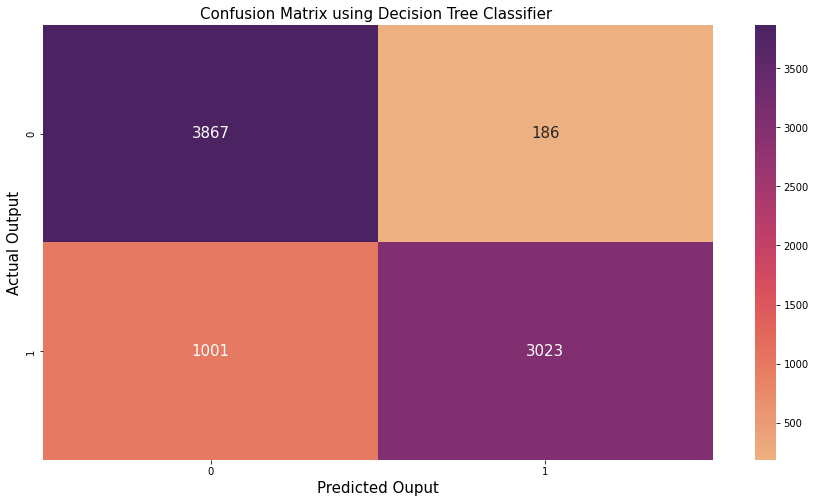

In [ ]:
plt.figure(figsize=(15,8))
zx = sns. heatmap(conf_matrix, cmap ='flare', annot_kws={"size": 15}, annot= True, fmt = 'd')
plt.title('Confusion Matrix using Decision Tree Classifier ', fontsize= 15)
plt.xlabel('Predicted Ouput', fontsize =15)
plt.ylabel('Actual Output', fontsize =15)
plt.show()

In [ ]:
#Tuning decision tree
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import GridSearchCV


# Define the Decision Tree classifier
dt = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=0)
grid_search.fit(X, y)

# Print the results
print("Best accuracy score: {:.2f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))


Best accuracy score: 0.70
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [ ]:

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)


In [ ]:
#Using RandomForest

# train a decision tree classifier on the data
#clf = DecisionTreeClassifier()

clf = RandomForestClassifier()

clf.fit(X_train_sc, y_train)

# test the classifier on the test set and print the classification report
y_pred = clf.predict(X_test_sc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4053
           1       0.95      0.87      0.91      4024

    accuracy                           0.91      8077
   macro avg       0.91      0.91      0.91      8077
weighted avg       0.91      0.91      0.91      8077



In [ ]:

Accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score:%.2f\n\n'%(Accuracy))
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('The confusion matrix is:')
print(conf_matrix,'\n\n')
print('---------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy score:0.91


The confusion matrix is:
[[3854  199]
 [ 512 3512]] 


---------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4053
           1       0.95      0.87      0.91      4024

    accuracy                           0.91      8077
   macro avg       0.91      0.91      0.91      8077
weighted avg       0.91      0.91      0.91      8077



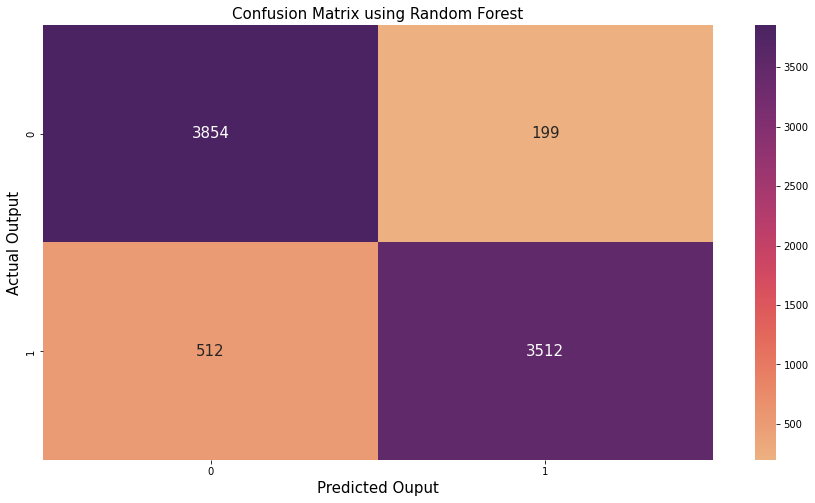

In [ ]:
plt.figure(figsize=(15,8))
zx = sns. heatmap(conf_matrix, cmap ='flare',annot_kws={"size": 15}, annot= True, fmt = 'd')
plt.title('Confusion Matrix using Random Forest', fontsize= 15)
plt.xlabel('Predicted Ouput', fontsize =15)
plt.ylabel('Actual Output', fontsize =15)
plt.show()

In [ ]:
# GRADIENT BOOSTED DECISION TREE

#Using Gradient Boosted Decision Tree
# train a decision tree classifier on the data
#clf = DecisionTreeClassifier()
#clf = RandomForestClassifier()

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.7, max_depth=16, random_state=42)
clf.fit(X_train_sc, y_train)

# test the classifier on the test set and print the classification report
y_pred = clf.predict(X_test_sc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4053
           1       0.94      0.92      0.93      4024

    accuracy                           0.93      8077
   macro avg       0.93      0.93      0.93      8077
weighted avg       0.93      0.93      0.93      8077



In [ ]:
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score:%.2f\n\n'%(Accuracy))
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('The confusion matrix is:')
print(conf_matrix,'\n\n')
print('---------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy score:0.93


The confusion matrix is:
[[3800  253]
 [ 326 3698]] 


---------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4053
           1       0.94      0.92      0.93      4024

    accuracy                           0.93      8077
   macro avg       0.93      0.93      0.93      8077
weighted avg       0.93      0.93      0.93      8077



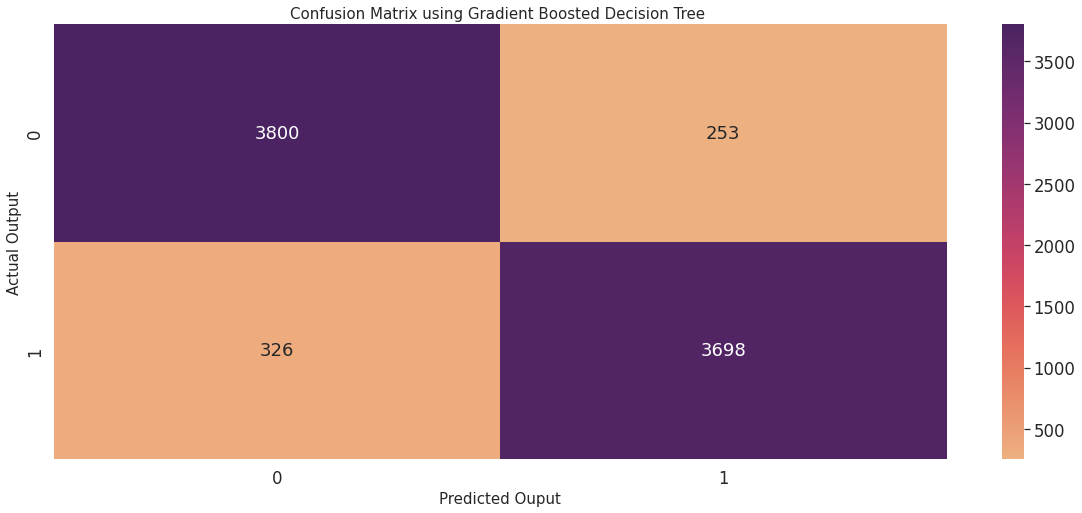

In [ ]:
plt.figure(figsize=(20,8))
zx = sns. heatmap(conf_matrix, cmap ='flare', annot_kws={"size": 18},annot= True, fmt = 'd')
plt.title('Confusion Matrix using Gradient Boosted Decision Tree ', fontsize= 15)
plt.xlabel('Predicted Ouput', fontsize =15)
plt.ylabel('Actual Output', fontsize =15)
plt.show()

In [ ]:
# Identifying top 5 features driving the model

In [ ]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

# Step 4: Model Evaluation
from sklearn.metrics import f1_score

y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred)
print(f"F1-score: {score:.4f}")

# Step 5: Feature Importance Analysis
feature_importances = clf.feature_importances_
feature_names = df.drop('repaid', axis=1).columns

# Step 6: Plot Feature Importance Graph
import matplotlib.pyplot as plt

top_features = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)[:5]
plt.bar(top_features.index, top_features)
plt.title('Top 5 Features Driving Model')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.show()


In [ ]:
#Using all features
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state = 40)




In [ ]:
scaler = StandardScaler()
X_train_scf = scaler.fit_transform(X_train)
X_test_scf = scaler.transform (X_test)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.7, max_depth=16, random_state=42)
clf.fit(X_train_scf, y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=16, random_state=42)

In [ ]:
# To run


# Step 4: Model Evaluation
from sklearn.metrics import f1_score



#
y_pred = clf.predict(X_test_scf)
score = f1_score(y_test, y_pred)
print(f"F1-score: {score:.4f}")

F1-score: 0.9394


In [ ]:
#Step 5: Feature Importance Analysis
feature_importances = clf.feature_importances_
feature_names = df3.drop('loan_status', axis=1).columns


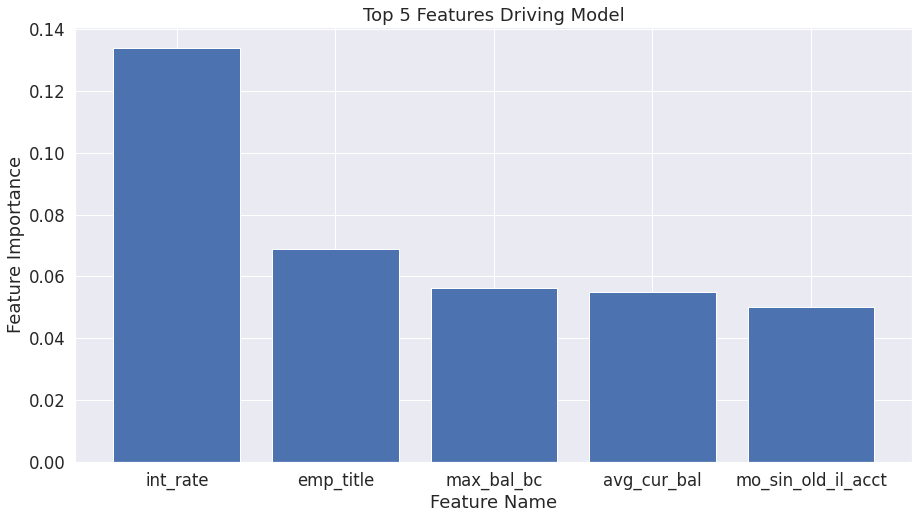

In [ ]:

# Step 6: Plot Feature Importance Graph
import matplotlib.pyplot as plt

top_features = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)[:5]
plt.figure(figsize=(15,8))
plt.bar(top_features.index, top_features)
plt.title('Top 5 Features Driving Model')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.show()

In [ ]:
# OTHER MODELS LIKE KNN AND NEURAL NETWORK

In [ ]:

model =KNeighborsClassifier(n_neighbors = 3, metric='minkowski', p=2)
model.fit(X_train_sc, y_train)
y_prediction = model.predict(X_test_sc)
print(y_prediction)

[1 0 0 ... 0 1 0]


In [ ]:

Accuracy = metrics.accuracy_score(y_test, y_prediction)
print('Accuracy score:%.2f\n\n'%(Accuracy))
conf_matrix = metrics.confusion_matrix(y_test, y_prediction)
print('The confusion matrix is:')
print(conf_matrix,'\n\n')
print('---------------------')
result = metrics.classification_report(y_test, y_prediction)
print('Classification Report:\n')
print(result)

Accuracy score:0.75


The confusion matrix is:
[[3517  536]
 [1514 2510]] 


---------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.87      0.77      4053
           1       0.82      0.62      0.71      4024

    accuracy                           0.75      8077
   macro avg       0.76      0.75      0.74      8077
weighted avg       0.76      0.75      0.74      8077



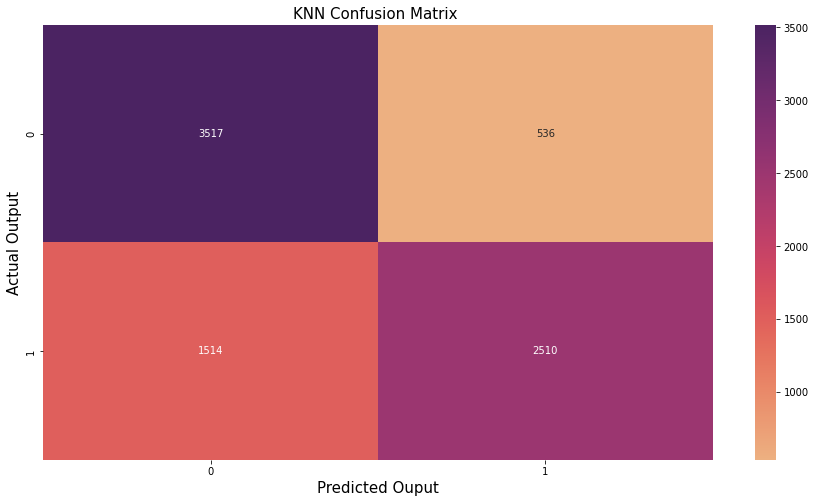

In [ ]:
plt.figure(figsize=(15,8))
zx = sns. heatmap(conf_matrix, cmap ='flare', annot= True, fmt = 'd')
plt.title('KNN Confusion Matrix ', fontsize= 15)
plt.xlabel('Predicted Ouput', fontsize =15)
plt.ylabel('Actual Output', fontsize =15)
plt.show()

In [ ]:
# Neural Networks

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10,activation='relu',input_shape=(10,)))
model.add(tf.keras.layers.Dense(2,activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics='accuracy')

In [ ]:
# summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_sc, y_train, \
 batch_size = 8, epochs= 50, \
 verbose=2, \
 validation_split=0.3)


Epoch 1/50
1649/1649 - 5s - loss: 0.6778 - accuracy: 0.6009 - val_loss: 0.6468 - val_accuracy: 0.6335 - 5s/epoch - 3ms/step
Epoch 2/50
1649/1649 - 3s - loss: 0.6426 - accuracy: 0.6294 - val_loss: 0.6342 - val_accuracy: 0.6397 - 3s/epoch - 2ms/step
Epoch 3/50
1649/1649 - 4s - loss: 0.6359 - accuracy: 0.6335 - val_loss: 0.6312 - val_accuracy: 0.6475 - 4s/epoch - 3ms/step
Epoch 4/50
1649/1649 - 4s - loss: 0.6341 - accuracy: 0.6366 - val_loss: 0.6302 - val_accuracy: 0.6440 - 4s/epoch - 2ms/step
Epoch 5/50
1649/1649 - 4s - loss: 0.6331 - accuracy: 0.6365 - val_loss: 0.6296 - val_accuracy: 0.6447 - 4s/epoch - 2ms/step
Epoch 6/50
1649/1649 - 4s - loss: 0.6322 - accuracy: 0.6376 - val_loss: 0.6284 - val_accuracy: 0.6496 - 4s/epoch - 2ms/step
Epoch 7/50
1649/1649 - 4s - loss: 0.6317 - accuracy: 0.6389 - val_loss: 0.6288 - val_accuracy: 0.6473 - 4s/epoch - 3ms/step
Epoch 8/50
1649/1649 - 3s - loss: 0.6312 - accuracy: 0.6385 - val_loss: 0.6289 - val_accuracy: 0.6440 - 3s/epoch - 2ms/step
Epoch 9/

In [ ]:
'''class_weights = {0:1, 1:2}
history = model.fit(X_train, y_train, \
 batch_size = 8, epochs= 50, \
 verbose=2, class_weight=class_weights, \
 validation_split=0.3)'''






'class_weights = {0:1, 1:2}\nhistory = model.fit(X_train, y_train,  batch_size = 8, epochs= 50,  verbose=2, class_weight=class_weights,  validation_split=0.3)'

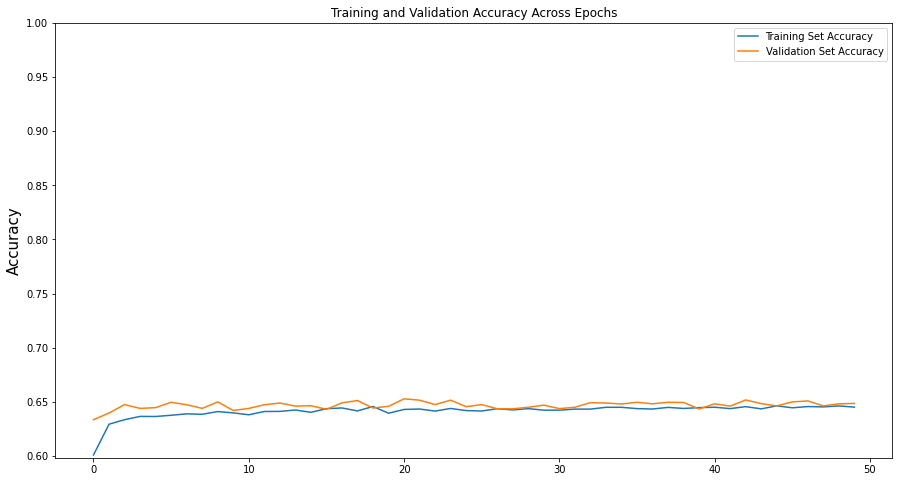

In [ ]:
plt.figure(figsize=(15,8))
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy', fontsize=15)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()


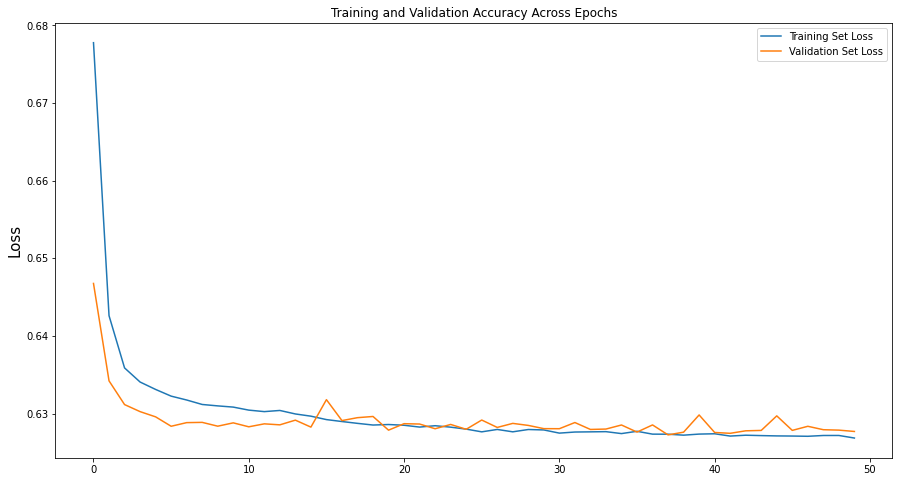

In [ ]:
plt.figure(figsize=(15,8))
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss', fontsize=15)
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()


In [ ]:
# To predict
'''model.fit(X_train_sc, y_train)
y_prediction = model.predict(X_test_sc)
print(y_prediction)'''

253/253 [==============================] - 1s 4ms/step


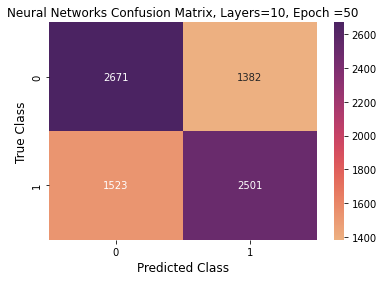

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      4053
           1       0.64      0.62      0.63      4024

    accuracy                           0.64      8077
   macro avg       0.64      0.64      0.64      8077
weighted avg       0.64      0.64      0.64      8077



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test_sc)
y_pred = y_pred.argmax(axis=1)

confusion_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Neural Networks Confusion Matrix, Layers=10, Epoch =50",fontsize=12)
plt.show()

print(classification_report(y_test,y_pred))

In [ ]:
# TO START NEURAL NETWORKS AGAIN

In [ ]:
df3.shape

(17042, 31)

In [ ]:
df3.head()

,id,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,802173,CA,72000.0,3.0,CA. Dept. Of Corrections,MORTGAGE,395.66,12000,debt_consolidation,36,...,12.8,7.6,0.2,2.8,16,40.94,0,23,76495.8,Fully Paid
1,14518910,TX,97500.0,1.0,Curriculum & Implementation Manager,RENT,966.47,35000,debt_consolidation,60,...,2.0,12.0,0.0,1.0,13,87.50,0,24,84227.0,Fully Paid
2,54333324,NY,120000.0,1.0,Senior manager,RENT,806.57,25000,credit_card,36,...,2.0,7.0,0.0,1.0,8,100.00,0,16,39124.0,Fully Paid
3,62247022,CA,130000.0,10.0,Border Patrol Agent,RENT,846.17,25225,debt_consolidation,36,...,9.0,3.0,0.0,2.0,8,50.00,0,24,123331.0,Fully Paid
4,71986114,TX,58296.0,10.0,Account Manager,MORTGAGE,41.79,1200,other,36,...,7.0,6.0,0.0,0.0,9,100.00,0,17,51794.0,Fully Paid


In [ ]:
# To drop 'id', 'addr_state', and 'emp_title'

In [ ]:

df3= df3.drop(['id','addr_state','emp_title'], axis=1)

In [ ]:
df3.head()

,annual_inc,emp_length,home_ownership,installment,loan_amnt,purpose,term,int_rate,avg_cur_bal,inq_last_12m,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,72000.0,3.0,MORTGAGE,395.66,12000,debt_consolidation,36,11.49,38162.6,0.8,...,12.8,7.6,0.2,2.8,16,40.94,0,23,76495.8,Fully Paid
1,97500.0,1.0,RENT,966.47,35000,debt_consolidation,60,21.99,7019.0,3.0,...,2.0,12.0,0.0,1.0,13,87.50,0,24,84227.0,Fully Paid
2,120000.0,1.0,RENT,806.57,25000,credit_card,36,9.99,4891.0,1.4,...,2.0,7.0,0.0,1.0,8,100.00,0,16,39124.0,Fully Paid
3,130000.0,10.0,RENT,846.17,25225,debt_consolidation,36,12.69,17619.0,2.4,...,9.0,3.0,0.0,2.0,8,50.00,0,24,123331.0,Fully Paid
4,58296.0,10.0,MORTGAGE,41.79,1200,other,36,15.31,12321.0,1.0,...,7.0,6.0,0.0,0.0,9,100.00,0,17,51794.0,Fully Paid


In [ ]:
df3.shape


(17042, 28)

In [ ]:
df3['loan_status'].value_counts(normalize=True)




Fully Paid     0.789872
Charged Off    0.210128
Name: loan_status, dtype: float64

In [ ]:
y.shape

(17042,)

In [ ]:
X.head()

,annual_inc,emp_length,home_ownership,installment,loan_amnt,purpose,term,int_rate,avg_cur_bal,inq_last_12m,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort
0,72000.0,3.0,MORTGAGE,395.66,12000,debt_consolidation,36,11.49,38162.6,0.8,...,5.8,12.8,7.6,0.2,2.8,16,40.94,0,23,76495.8
1,97500.0,1.0,RENT,966.47,35000,debt_consolidation,60,21.99,7019.0,3.0,...,14.0,2.0,12.0,0.0,1.0,13,87.50,0,24,84227.0
2,120000.0,1.0,RENT,806.57,25000,credit_card,36,9.99,4891.0,1.4,...,11.0,2.0,7.0,0.0,1.0,8,100.00,0,16,39124.0
3,130000.0,10.0,RENT,846.17,25225,debt_consolidation,36,12.69,17619.0,2.4,...,9.0,9.0,3.0,0.0,2.0,8,50.00,0,24,123331.0
4,58296.0,10.0,MORTGAGE,41.79,1200,other,36,15.31,12321.0,1.0,...,7.0,7.0,6.0,0.0,0.0,9,100.00,0,17,51794.0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17042 entries, 0 to 18323
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   annual_inc              17042 non-null  float64
 1   emp_length              17042 non-null  float64
 2   home_ownership          17042 non-null  object 
 3   installment             17042 non-null  float64
 4   loan_amnt               17042 non-null  int64  
 5   purpose                 17042 non-null  object 
 6   term                    17042 non-null  int64  
 7   int_rate                17042 non-null  float64
 8   avg_cur_bal             17042 non-null  float64
 9   inq_last_12m            17042 non-null  float64
 10  max_bal_bc              17042 non-null  float64
 11  mo_sin_old_il_acct      17042 non-null  float64
 12  mo_sin_old_rev_tl_op    17042 non-null  float64
 13  mo_sin_rcnt_rev_tl_op   17042 non-null  float64
 14  mo_sin_rcnt_tl          17042 non-null

In [ ]:
#from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

# define the columns to be encoded
columns_to_encode = ['home_ownership', 'purpose', 'loan_status']

# loop through each column and encode the values
for col in columns_to_encode:
    df3[col] = le.fit_transform(df3[col])


In [ ]:

df3.head()



,annual_inc,emp_length,home_ownership,installment,loan_amnt,purpose,term,int_rate,avg_cur_bal,inq_last_12m,...,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
0,72000.0,3.0,1,395.66,12000,2,36,11.49,38162.6,0.8,...,12.8,7.6,0.2,2.8,16,40.94,0,23,76495.8,1
1,97500.0,1.0,4,966.47,35000,2,60,21.99,7019.0,3.0,...,2.0,12.0,0.0,1.0,13,87.50,0,24,84227.0,1
2,120000.0,1.0,4,806.57,25000,1,36,9.99,4891.0,1.4,...,2.0,7.0,0.0,1.0,8,100.00,0,16,39124.0,1
3,130000.0,10.0,4,846.17,25225,2,36,12.69,17619.0,2.4,...,9.0,3.0,0.0,2.0,8,50.00,0,24,123331.0,1
4,58296.0,10.0,1,41.79,1200,9,36,15.31,12321.0,1.0,...,7.0,6.0,0.0,0.0,9,100.00,0,17,51794.0,1


In [ ]:
df3['loan_status'].value_counts(normalize=True)




1    0.789872
0    0.210128
Name: loan_status, dtype: float64

In [ ]:
# handle class imbalance using oversampling
X = df3.drop('loan_status', axis=1)
y = df3['loan_status']

In [ ]:
X = df3.iloc[:, 0:27].values
y = df3.iloc[:, 27].values

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state = 40)



In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform (X_test)

In [ ]:
# Feature selection
# selector = SelectKBest(f_classif, k=3)
# selector = SelectKBest(f_classif, k=5)
selector = SelectKBest(f_classif, k=12)

X_train_fs = selector.fit_transform(X_train_std, y_train)
X_test_fs = selector.transform(X_test_std)

In [ ]:

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(10,activation='relu',input_shape=(12,)))
model.add(tf.keras.layers.Dense(2,activation='sigmoid'))

model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics='accuracy')

class_weights = {0:3, 1:1}
history = model.fit(X_train_fs, y_train, \
 batch_size = 15, epochs= 50, \
 verbose=2, class_weight=class_weights, \
 validation_split=0.3)



Epoch 1/50
557/557 - 2s - loss: 1.0717 - accuracy: 0.6041 - val_loss: 0.6623 - val_accuracy: 0.5932 - 2s/epoch - 4ms/step
Epoch 2/50
557/557 - 2s - loss: 0.9910 - accuracy: 0.6578 - val_loss: 0.6516 - val_accuracy: 0.6636 - 2s/epoch - 3ms/step
Epoch 3/50
557/557 - 1s - loss: 0.9829 - accuracy: 0.7030 - val_loss: 0.6450 - val_accuracy: 0.7027 - 1s/epoch - 2ms/step
Epoch 4/50
557/557 - 1s - loss: 0.9802 - accuracy: 0.7132 - val_loss: 0.6325 - val_accuracy: 0.7463 - 1s/epoch - 2ms/step
Epoch 5/50
557/557 - 1s - loss: 0.9786 - accuracy: 0.7363 - val_loss: 0.6371 - val_accuracy: 0.7435 - 1s/epoch - 2ms/step
Epoch 6/50
557/557 - 1s - loss: 0.9771 - accuracy: 0.7436 - val_loss: 0.6412 - val_accuracy: 0.7379 - 1s/epoch - 2ms/step
Epoch 7/50
557/557 - 1s - loss: 0.9763 - accuracy: 0.7504 - val_loss: 0.6515 - val_accuracy: 0.7164 - 1s/epoch - 2ms/step
Epoch 8/50
557/557 - 1s - loss: 0.9757 - accuracy: 0.7394 - val_loss: 0.6352 - val_accuracy: 0.7589 - 1s/epoch - 2ms/step
Epoch 9/50
557/557 - 1s 

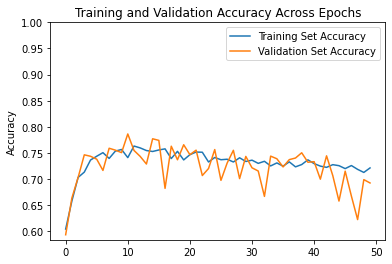

In [ ]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()






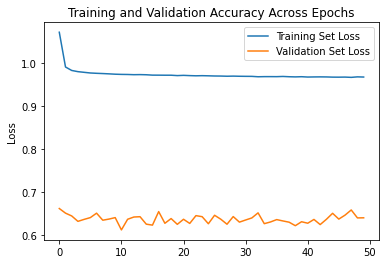

In [ ]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

160/160 [==============================] - 0s 1ms/step


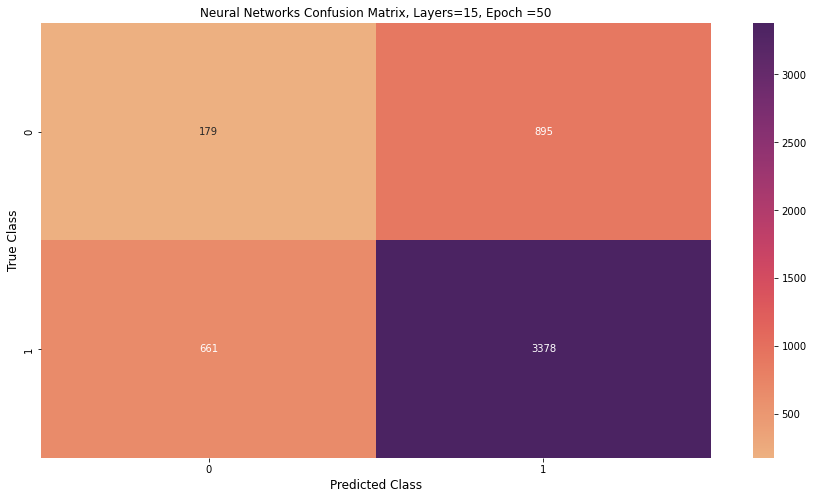

              precision    recall  f1-score   support

           0       0.21      0.17      0.19      1074
           1       0.79      0.84      0.81      4039

    accuracy                           0.70      5113
   macro avg       0.50      0.50      0.50      5113
weighted avg       0.67      0.70      0.68      5113



In [ ]:


from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test_fs)
y_pred = y_pred.argmax(axis=1)

confusion_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(15,8))
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Neural Networks Confusion Matrix, Layers=15, Epoch =50",fontsize=12)
plt.show()

print(classification_report(y_test,y_pred))


In [ ]:
# THESE CODES HELP TO SHOW FEATURE IMPORTANCE. THEY WERE NOT RAN

In [ ]:
# Step 1: Data Preparation
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('loan_data.csv')

# Preprocessing
df.dropna(inplace=True)  # remove missing values
X = df.drop('repaid', axis=1)
y = df['repaid']
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 2: Data Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

# Step 4: Model Evaluation
from sklearn.metrics import f1_score

y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred)
print(f"F1-score: {score:.4f}")

# Step 5: Feature Importance Analysis
feature_importances = clf.feature_importances_
feature_names = df.drop('repaid', axis=1).columns

# Step 6: Plot Feature Importance Graph
import matplotlib.pyplot as plt

top_features = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)[:5]
plt.bar(top_features.index, top_features)
plt.title('Top 5 Features Driving Model')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.show()


In [ ]:
# Import the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

# Load the dataset
df = pd.read_csv('loan_data.csv')

# Preprocess the data
# ...

# Split the data
X = df.drop(['repay_loan'], axis=1)
y = df['repay_loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
gbdt = GradientBoostingClassifier()
gbdt.fit(X_train, y_train)

# Evaluate the model
y_pred = gbdt.predict(X_test)
f1 = f1_score(y_test, y_pred)

print(f"F1-score: {f1}")

# Interpret the model
feature_importances = gbdt.feature_importances_
top5 = pd.Series(feature_importances, index=X_train.columns).nlargest(5)
print(top5)
